# Projeto 5 (Vamo AI) - Storytelling com nossos dados
* **Base de dados:** Netflix, Instagram
* **Integrantes do Time:** Thiago Silva, Natascha Weber

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpeza de dados Instagram

In [ ]:
df_instagram_likes = pd.read_json("liked_posts.json", encoding='UTF-8')
df_instagram_likes.head()

,likes_media_likes
0,"{'title': 'geeakel', 'media_list_data': [], 's..."
1,"{'title': 'flastringa', 'media_list_data': [],..."
2,"{'title': 'ricardopborges', 'media_list_data':..."
3,"{'title': 'victorlopes13', 'media_list_data': ..."
4,"{'title': 'gabimelle', 'media_list_data': [], ..."


In [ ]:
timestamp = pd.json_normalize(df_instagram_likes["likes_media_likes"], "string_list_data")['timestamp']
timestamp

0       1513636259
1       1513556522
2       1513479388
3       1513479371
4       1513474354
           ...    
2869    1514052683
2870    1513982872
2871    1513979464
2872    1513979456
2873    1513728679
Name: timestamp, Length: 2874, dtype: int64

In [ ]:
title = pd.json_normalize(df_instagram_likes["likes_media_likes"])["title"]
title

0              geeakel
1           flastringa
2       ricardopborges
3        victorlopes13
4            gabimelle
             ...      
2869      jackdanniels
2870      jackdanniels
2871     victorlopes13
2872         gabimelle
2873       thuoliveira
Name: title, Length: 2874, dtype: object

In [ ]:
data = {
    'title': title,
    'timestamp': timestamp 
}

df_instagram_likes = pd.concat(data, axis = 1)

df_instagram_likes.head()

,title,timestamp
0,geeakel,1513636259
1,flastringa,1513556522
2,ricardopborges,1513479388
3,victorlopes13,1513479371
4,gabimelle,1513474354


In [ ]:
df_instagram_likes.shape

(2874, 2)

In [ ]:
df_instagram_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      2874 non-null   object
 1   timestamp  2874 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.0+ KB


In [ ]:
# convertendo timestamp para tipo datetime
df_instagram_likes['timestamp'] = pd.to_datetime(df_instagram_likes['timestamp'], unit='s')

In [ ]:
df_instagram_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874 entries, 0 to 2873
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      2874 non-null   object        
 1   timestamp  2874 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 45.0+ KB


In [ ]:
# extraido ano, mes, dia e nome do dia a partir do timestamp
df_instagram_likes['year'] = pd.DatetimeIndex(df_instagram_likes['timestamp']).year
df_instagram_likes['month'] = pd.DatetimeIndex(df_instagram_likes['timestamp']).month
df_instagram_likes['day'] = pd.DatetimeIndex(df_instagram_likes['timestamp']).day
df_instagram_likes['day_name'] = df_instagram_likes['timestamp'].dt.day_name()
df_instagram_likes.head()

,title,timestamp,year,month,day,day_name
0,geeakel,2017-12-18 22:30:59,2017,12,18,Monday
1,flastringa,2017-12-18 00:22:02,2017,12,18,Monday
2,ricardopborges,2017-12-17 02:56:28,2017,12,17,Sunday
3,victorlopes13,2017-12-17 02:56:11,2017,12,17,Sunday
4,gabimelle,2017-12-17 01:32:34,2017,12,17,Sunday


In [ ]:
df_instagram_likes['timestamp'].dt.hour

0       22
1        0
2        2
3        2
4        1
        ..
2869    18
2870    22
2871    21
2872    21
2873     0
Name: timestamp, Length: 2874, dtype: int64

In [ ]:
# criando nova coluna com a categoria da parte do dia (cedo da manhã, manhã, noite, etc)
def get_part_of_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

df_instagram_likes['part_of_day'] = df_instagram_likes['timestamp'].dt.hour.apply(get_part_of_day)

In [ ]:
# mudando valores coluna mês para seus devidos nomes
month = {	
    1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'		
}

df_instagram_likes["month"].replace(month, inplace=True)
df_instagram_likes.head()

,title,timestamp,year,month,day,day_name,part_of_day
0,geeakel,2017-12-18 22:30:59,2017,December,18,Monday,Night
1,flastringa,2017-12-18 00:22:02,2017,December,18,Monday,Late Night
2,ricardopborges,2017-12-17 02:56:28,2017,December,17,Sunday,Late Night
3,victorlopes13,2017-12-17 02:56:11,2017,December,17,Sunday,Late Night
4,gabimelle,2017-12-17 01:32:34,2017,December,17,Sunday,Late Night


In [ ]:
df_instagram_likes.to_csv('df_instagram_likes.csv')

# Análise exploratória Instragam Dados

In [ ]:
df_instagram_likes = pd.read_csv('df_instagram_likes.csv', index_col=[0])
df_instagram_likes['timestamp'] = pd.to_datetime(df_instagram_likes['timestamp'])
df_instagram_likes.head()

,title,timestamp,year,month,day,day_name,part_of_day
0,geeakel,2017-12-18 22:30:59,2017,December,18,Monday,Night
1,flastringa,2017-12-18 00:22:02,2017,December,18,Monday,Late Night
2,ricardopborges,2017-12-17 02:56:28,2017,December,17,Sunday,Late Night
3,victorlopes13,2017-12-17 02:56:11,2017,December,17,Sunday,Late Night
4,gabimelle,2017-12-17 01:32:34,2017,December,17,Sunday,Late Night


In [ ]:
df_instagram_likes.shape

(2874, 7)

In [ ]:
# quantidade de likes por ano
frequencia_ano = df_instagram_likes['year'].value_counts()
percentual_ano = df_instagram_likes['year'].value_counts(normalize = True) * 100
dist_freq_ano = pd.DataFrame({'Frequência_Likes': frequencia_ano, 'Porcentagem (%)': percentual_ano})

dist_freq_ano

,Frequência_Likes,Porcentagem (%)
2020,864,30.062630
2019,528,18.371608
2021,471,16.388309
2017,367,12.769659
2018,352,12.247738
2013,110,3.827418
2014,64,2.226862
2016,51,1.774530
2015,40,1.391788
2012,27,0.939457


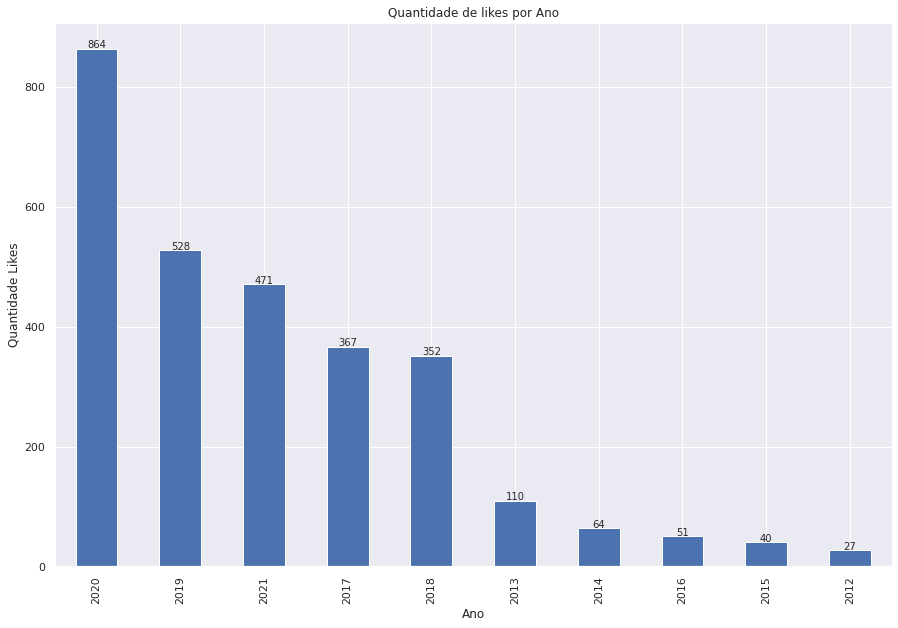

In [ ]:
# grafico quantidade de likes por ano
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Quantidade de likes por Ano')
dist_freq_ano['Frequência_Likes'].plot.bar()

for index, data in enumerate(dist_freq_ano['Frequência_Likes']):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Ano')
plt.ylabel('Quantidade Likes')

plt.show()

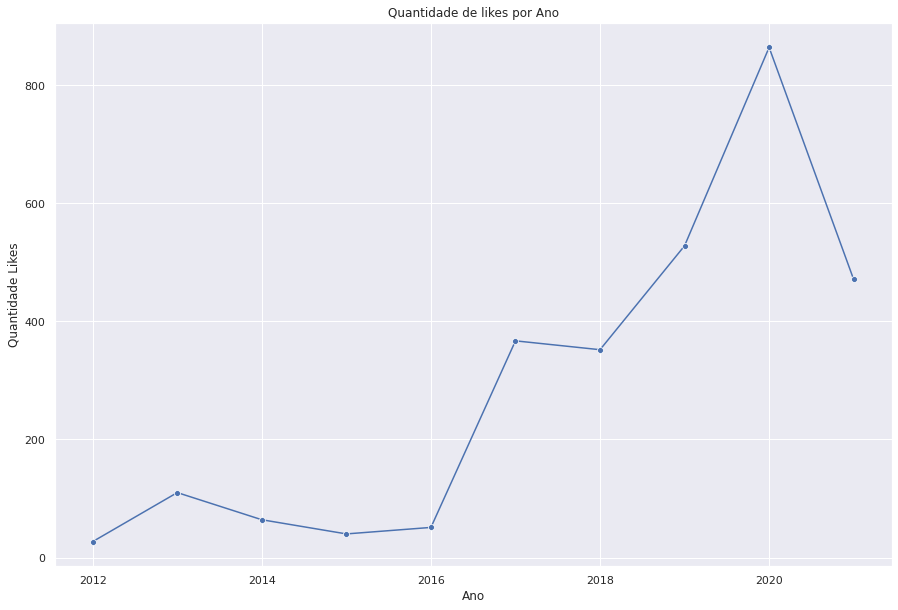

In [ ]:
# grafico quantidade de likes por ano
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Quantidade de likes por Ano')
sns.lineplot(data=dist_freq_ano, x=dist_freq_ano.index, y=dist_freq_ano['Frequência_Likes'], marker="o")

plt.xlabel('Ano')
plt.ylabel('Quantidade Likes')

plt.show()

In [ ]:
# quantidade de likes por mes
frequencia_mes = df_instagram_likes['month'].value_counts()
percentual_mes = df_instagram_likes['month'].value_counts(normalize = True) * 100
dist_freq_mes = pd.DataFrame({'Frequência_Likes': frequencia_mes, 'Porcentagem (%)': percentual_mes})

dist_freq_mes

,Frequência_Likes,Porcentagem (%)
December,337,11.725818
June,283,9.846903
January,279,9.707724
April,267,9.290188
October,238,8.281141
May,237,8.246347
November,237,8.246347
July,230,8.002784
March,221,7.689631
September,193,6.715379


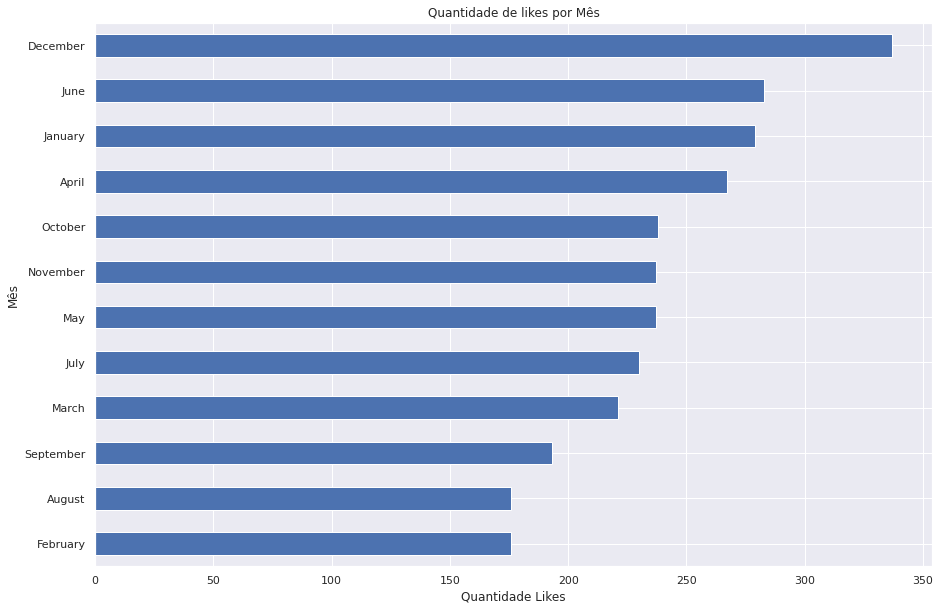

In [ ]:
# grafico quantidade de likes por Mês
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Quantidade de likes por Mês')
dist_freq_mes['Frequência_Likes'].sort_values(ascending=True).plot.barh()

plt.xlabel('Quantidade Likes')
plt.ylabel('Mês')

plt.show()

In [ ]:
# quantidade de likes por day_name
frequencia_day_name = df_instagram_likes['day_name'].value_counts()
percentual_day_name = df_instagram_likes['day_name'].value_counts(normalize = True) * 100
dist_freq_day_name = pd.DataFrame({'Frequência_Likes': frequencia_day_name, 'Porcentagem (%)': percentual_day_name})

dist_freq_day_name

,Frequência_Likes,Porcentagem (%)
Monday,458,15.935978
Friday,438,15.240084
Sunday,433,15.066110
Tuesday,391,13.604732
Wednesday,389,13.535143
Thursday,387,13.465553
Saturday,378,13.152401


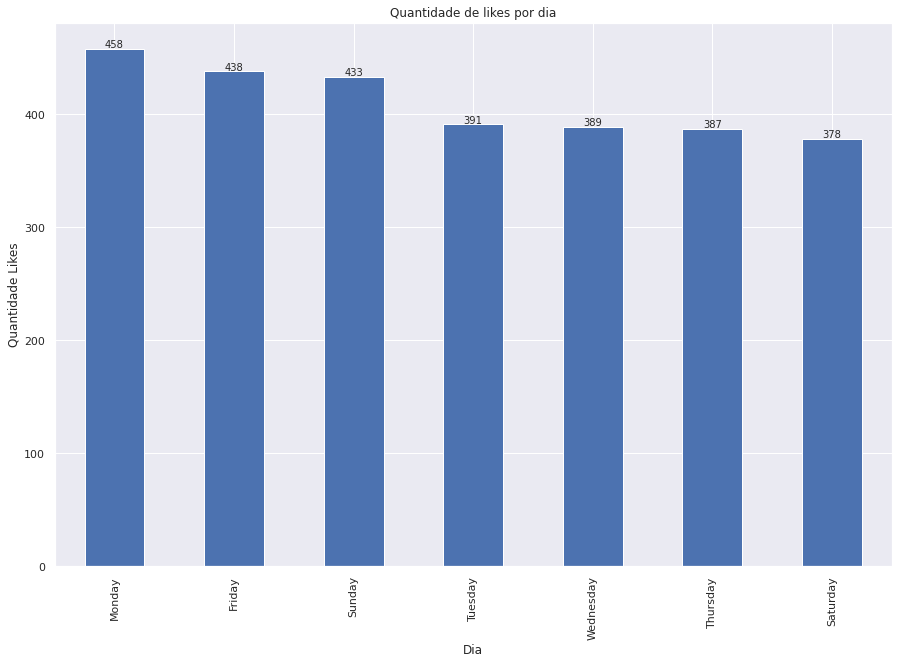

In [ ]:
# grafico quantidade de likes por day_name
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Quantidade de likes por dia')
dist_freq_day_name['Frequência_Likes'].plot.bar()

for index, data in enumerate(dist_freq_day_name['Frequência_Likes']):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Dia')
plt.ylabel('Quantidade Likes')

plt.show()

In [ ]:
# quantidade de likes por part_of_day
frequencia_part_of_day = df_instagram_likes['part_of_day'].value_counts()
percentual_part_of_day = df_instagram_likes['part_of_day'].value_counts(normalize = True) * 100
dist_freq_part_of_day_likes = pd.DataFrame({'Frequência_Likes': frequencia_part_of_day, 'Porcentagem (%)': percentual_part_of_day})

dist_freq_part_of_day_likes

,Frequência_Likes,Porcentagem (%)
Late Night,821,28.566458
Night,624,21.711900
Evening,584,20.320111
Noon,504,17.536534
Morning,191,6.645790
Early Morning,150,5.219207


In [ ]:
'''
part_of_day
hora > 4 and hora <= 8:Early Morning
hora > 8 and hora <= 12:Morning
hora > 12 and hora <= 16:Noon
hora > 16 and hora <= 20: Evening
hora > 20 and hora <= 24: Night
hora <= 4: Late Night
'''

likes_part_of_day_dict = {
    'Early Morning': 0,
    'Morning': 0,
    'Noon': 0,
    'Evening': 0,
    'Night': 0,
    'Late Night': 0
}

likes_part_of_day_dict["Early Morning"] = dist_freq_part_of_day_likes['Frequência_Likes']['Early Morning']
likes_part_of_day_dict["Morning"] = dist_freq_part_of_day_likes['Frequência_Likes']['Morning']
likes_part_of_day_dict["Noon"] = dist_freq_part_of_day_likes['Frequência_Likes']['Noon']
likes_part_of_day_dict["Evening"] = dist_freq_part_of_day_likes['Frequência_Likes']['Evening']
likes_part_of_day_dict["Night"] = dist_freq_part_of_day_likes['Frequência_Likes']['Night']
likes_part_of_day_dict["Late Night"] = dist_freq_part_of_day_likes['Frequência_Likes']['Late Night']

likes_por_part_of_day = pd.DataFrame.from_dict(likes_part_of_day_dict, orient='index', columns=['Access_Number'])
likes_por_part_of_day

,Access_Number
Early Morning,150
Morning,191
Noon,504
Evening,584
Night,624
Late Night,821


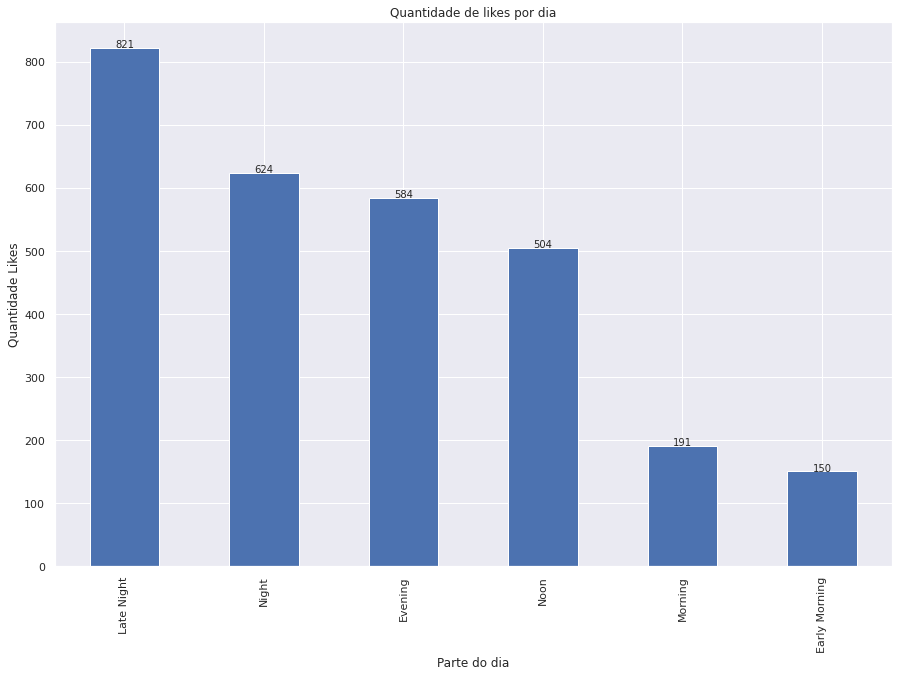

In [ ]:
# grafico quantidade de likes por part_of_day
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Quantidade de likes por dia')
likes_por_part_of_day['Access_Number'].sort_values(ascending=False).plot.bar()

for index, data in enumerate(likes_por_part_of_day['Access_Number'].sort_values(ascending=False)):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Parte do dia')
plt.ylabel('Quantidade Likes')

plt.show()

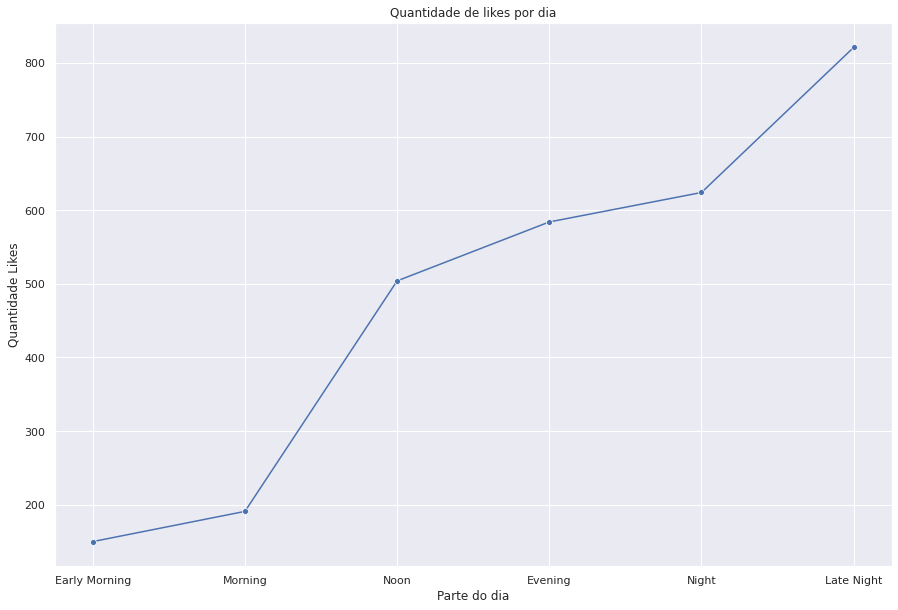

In [ ]:
# grafico quantidade de likes por part_of_day
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Quantidade de likes por dia')
sns.lineplot(data=likes_por_part_of_day, x=likes_por_part_of_day.index, y=likes_por_part_of_day['Access_Number'], marker="o")

plt.xlabel('Parte do dia')
plt.ylabel('Quantidade Likes')

plt.show()

'''
part_of_day
hora > 4 and hora <= 8:Early Morning
hora > 8 and hora <= 12:Morning
hora > 12 and hora <= 16:Noon
hora > 16 and hora <= 20: Evening
hora > 20 and hora <= 24: Night
hora <= 4: Late Night
'''

In [ ]:
# quantidade de likes por title
frequencia_title = df_instagram_likes['title'].value_counts()
percentual_title = df_instagram_likes['title'].value_counts(normalize = True) * 100
dist_freq_title = pd.DataFrame({'Frequência_Likes': frequencia_title, 'Porcentagem (%)': percentual_title})

dist_freq_title[:10]

,Frequência_Likes,Porcentagem (%)
thuoliveira,187,6.506611
signoszueiras,151,5.254001
umfilmemedisse,122,4.244955
animalfactkingdom,90,3.131524
astroloucamente,85,2.957550
barrysbanterbus,77,2.679193
theellenshow,73,2.540014
flastringa,65,2.261656
crazybitchprobs,61,2.122477
caiohs,57,1.983299


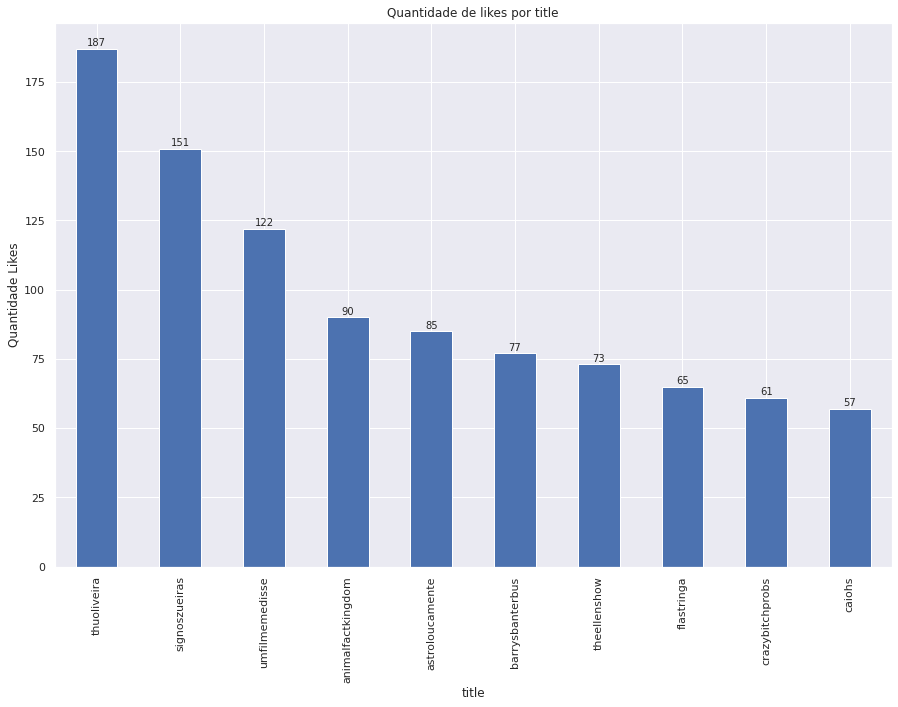

In [ ]:
# grafico quantidade de likes por title
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Quantidade de likes por title')
dist_freq_title['Frequência_Likes'][:10].plot.bar()

for index, data in enumerate(dist_freq_title['Frequência_Likes'][:10]):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('title')
plt.ylabel('Quantidade Likes')

plt.show()

# Limpeza de dados Netflix (billing_history)

In [ ]:
df_netflix_billing_history = pd.read_csv('BillingHistory.csv')
df_netflix_billing_history.head()

,Transaction Date,Service Period Start Date,Service Period End Date,Description,Payment Type,Mop Last 4,Mop Creation Date,Mop Pmt Processor Desc,Item Price Amt,Currency,Tax Amt,Gross Sale Amt,Pmt Txn Type,Pmt Status,Final Invoice Result,Country,Next Billing Date
0,2021-07-08,NaN,NaN,payment_transaction,CC,4043.0,NaN,NaN,NaN,BRL,NaN,32.9,SALE,NEW,NaN,BR,NaN
1,2021-07-08,2021-07-08,2021-08-07,SUBSCRIPTION,MASTERCARD,4043.0,NaN,ADYEN,32.9,BRL,3.7,32.9,SALE,NEW,SETTLED,BR,2021-08-08
2,2021-07-08,NaN,NaN,payment_transaction,CC,4043.0,NaN,NaN,NaN,BRL,NaN,32.9,SALE,APPROVED,NaN,BR,NaN
3,2021-07-08,2021-07-08,2021-08-07,SUBSCRIPTION,MASTERCARD,4043.0,NaN,ADYEN,32.9,BRL,3.7,32.9,SALE,APPROVED,SETTLED,BR,2021-08-08
4,2021-06-08,NaN,NaN,payment_transaction,CC,4043.0,NaN,NaN,NaN,BRL,NaN,32.9,SALE,NEW,NaN,BR,NaN


In [ ]:
df_netflix_billing_history = df_netflix_billing_history.rename(columns={
    "Transaction Date": "Transaction_Date", 
    "Payment Type": "Payment_Type",
    "Item Price Amt": "Item_Price_Amt",
    "Gross Sale Amt": "Gross_Sale_Amt",
    "Tax Amt": "Tax_Amt",
    "Pmt Status": "Pmt_Status" 
    })
df_netflix_billing_history = df_netflix_billing_history.query("Pmt_Status == 'APPROVED' & Description == 'SUBSCRIPTION'")
df_netflix_billing_history = df_netflix_billing_history[['Transaction_Date', 'Payment_Type', 'Item_Price_Amt','Gross_Sale_Amt', 'Tax_Amt', 'Pmt_Status']]

In [ ]:
df_netflix_billing_history.head()
# "Transaction Date" - a data (UTC) em que a forma de pagamento registrada foi cobrada.
# "Payment Type" - a forma de pagamento associado a sua conta.
# "Item Price Amt" - o valor total do plano de assinatura, sem a inclusão de impostos, que representa o valor da venda.
# “Gross Sale Amt” – o valor total cobrado pela assinatura, incluindo o valor dos impostos e o valor da venda.
# "Tax_Amt" - o valor dos impostos aplicado ao valor da venda do serviço de assinatura.
# “Pmt Status” – o status da transação de pagamento.

,Transaction_Date,Payment_Type,Item_Price_Amt,Gross_Sale_Amt,Tax_Amt,Pmt_Status
3,2021-07-08,MASTERCARD,32.9,32.9,3.7,APPROVED
5,2021-06-08,MASTERCARD,32.9,32.9,3.7,APPROVED
8,2021-05-08,MASTERCARD,32.9,32.9,3.7,APPROVED
11,2021-04-08,MASTERCARD,32.9,32.9,3.7,APPROVED
13,2021-03-08,MASTERCARD,32.9,32.9,3.7,APPROVED


In [ ]:
df_netflix_billing_history.shape

(53, 6)

In [ ]:
df_netflix_billing_history['Transaction_Date'] = pd.to_datetime(df_netflix_billing_history['Transaction_Date'])
df_netflix_billing_history['year'] = pd.DatetimeIndex(df_netflix_billing_history['Transaction_Date']).year

In [ ]:
df_netflix_billing_history.head()

,Transaction_Date,Payment_Type,Item_Price_Amt,Gross_Sale_Amt,Tax_Amt,Pmt_Status,year,month
3,2021-07-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,7
5,2021-06-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,6
8,2021-05-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,5
11,2021-04-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,4
13,2021-03-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,3


In [ ]:
df_netflix_billing_history.to_csv('df_netflix_billing_history.csv')

# Análise exploratória Netflix (billing_history)

In [ ]:
df_netflix_billing_history = pd.read_csv('df_netflix_billing_history.csv', index_col=[0])
df_netflix_billing_history['Transaction_Date'] = pd.to_datetime(df_netflix_billing_history['Transaction_Date'])
df_netflix_billing_history.head()

# "Transaction Date" - a data (UTC) em que a forma de pagamento registrada foi cobrada.
# "Payment Type" - a forma de pagamento associado a sua conta.
# "Item Price Amt" - o valor total do plano de assinatura, sem a inclusão de impostos, que representa o valor da venda.
# “Gross Sale Amt” – o valor total cobrado pela assinatura, incluindo o valor dos impostos e o valor da venda.
# "Tax_Amt" - o valor dos impostos aplicado ao valor da venda do serviço de assinatura.
# “Pmt Status” – o status da transação de pagamento.

,Transaction_Date,Payment_Type,Item_Price_Amt,Gross_Sale_Amt,Tax_Amt,Pmt_Status,year,month
3,2021-07-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,7
5,2021-06-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,6
8,2021-05-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,5
11,2021-04-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,4
13,2021-03-08,MASTERCARD,32.9,32.9,3.7,APPROVED,2021,3


In [ ]:
df_netflix_billing_history["Payment_Type"].value_counts()

MASTERCARD    34
AMEX          19
Name: Payment_Type, dtype: int64

In [ ]:
# preços da assinatura
df_netflix_billing_history["Gross_Sale_Amt"].unique()

array([32.9, 45.9, 37.9, 27.9])

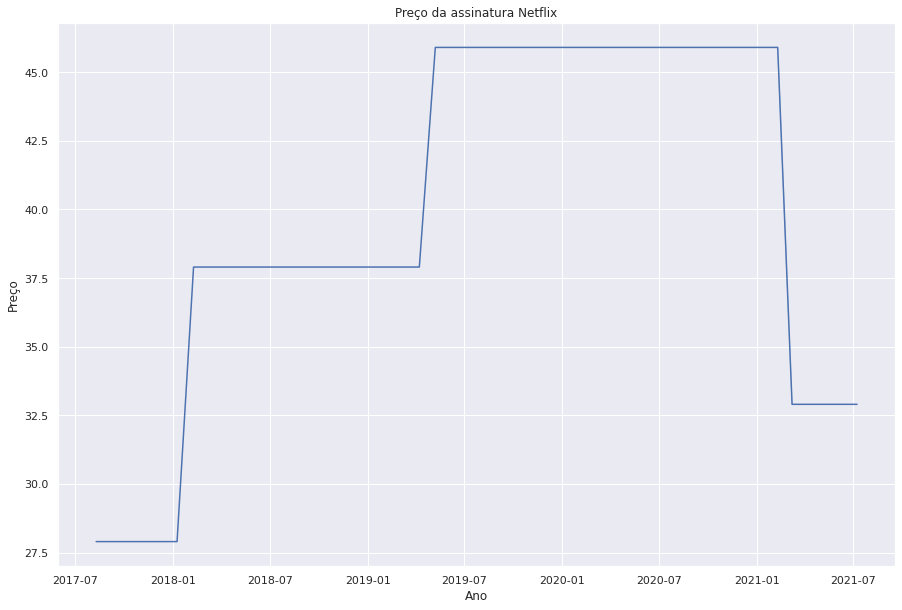

In [ ]:
sns.set()
plt.figure(figsize=(15,10))
plt.title('Preço da assinatura Netflix')
sns.lineplot(x=df_netflix_billing_history['Transaction_Date'], y=df_netflix_billing_history['Gross_Sale_Amt'])

plt.xlabel('Ano')
plt.ylabel('Preço')

plt.show()

In [ ]:
# Total de impostos (Tax_Amt)
print(f'Total de impostos cobrados: R${df_netflix_billing_history["Tax_Amt"].sum():.2f}')

Total de impostos cobrados: R$233.72


In [ ]:
# preços do imposto
df_netflix_billing_history["Tax_Amt"].unique()

array([3.7 , 5.16, 4.26, 3.14, 2.58])

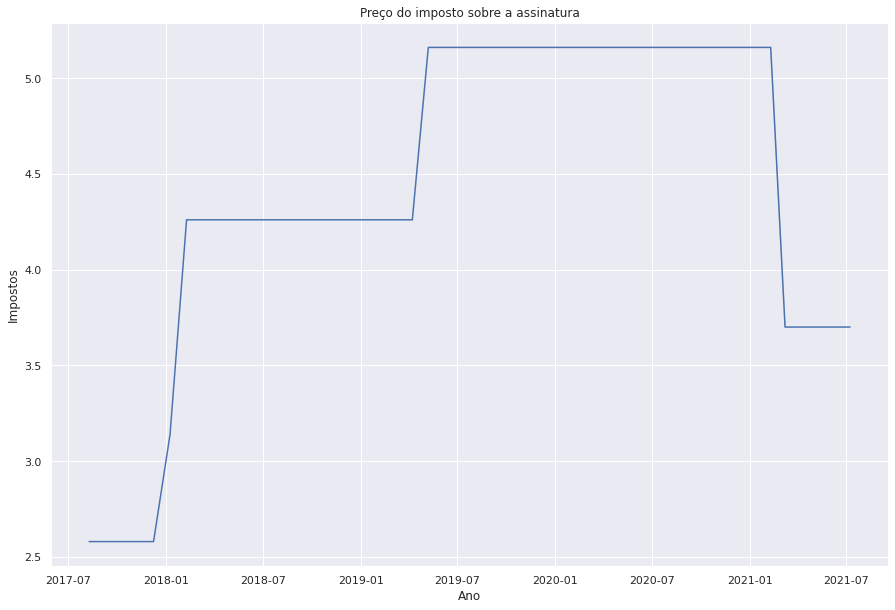

In [ ]:
sns.set()
plt.figure(figsize=(15,10))
plt.title('Preço do imposto sobre a assinatura')
sns.lineplot(x=df_netflix_billing_history['Transaction_Date'], y=df_netflix_billing_history['Tax_Amt'])

plt.xlabel('Ano')
plt.ylabel('Impostos')

plt.show()

In [ ]:
# Total de impostos (Tax_Amt) por ano
impostos_por_ano = df_netflix_billing_history.groupby(['year'], as_index=False)['Tax_Amt'].sum()
impostos_por_ano.set_index("year", inplace=True)
impostos_por_ano

,Tax_Amt
year,
2017,15.48
2018,50.00
2019,63.48
2020,67.08
2021,37.68


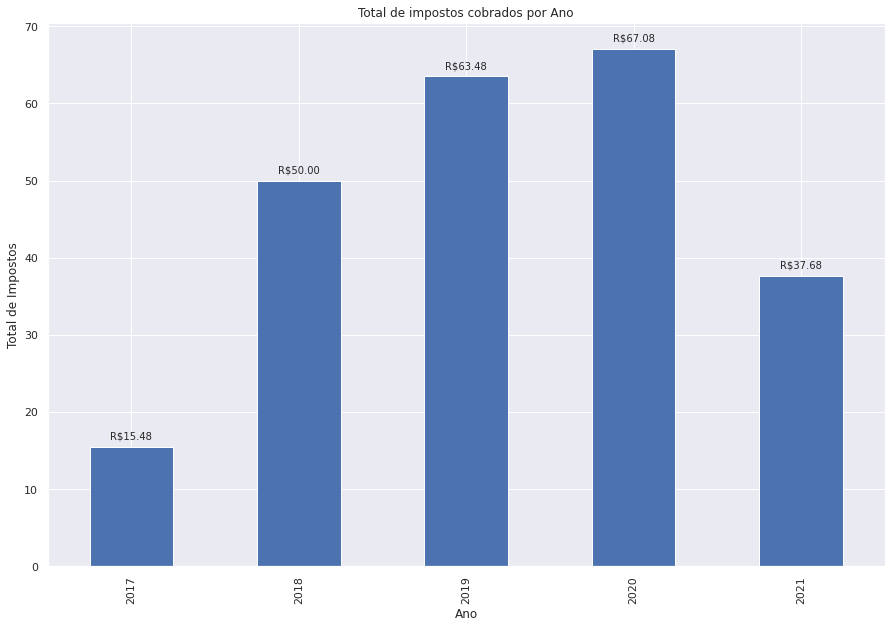

In [ ]:
# Grafico Total de impostos (Tax_Amt) por ano
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total de impostos cobrados por Ano')
impostos_por_ano["Tax_Amt"].plot.bar()

for index, data in enumerate(impostos_por_ano["Tax_Amt"]):
    plt.text(x=index , y=data+1, s=f"R${data:.2f}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Ano')
plt.ylabel('Total de Impostos')

plt.show()

In [ ]:
# Total gasto na assinatura com impostos (Gross_Sale_Amt)
print(f'Total gasto na assinatura com impostos: R${df_netflix_billing_history["Gross_Sale_Amt"].sum():.2f}')

Total gasto na assinatura com impostos: R$2108.70


In [ ]:
# Total gasto na assinatura sem impostos (Item_Price_Amt)
print(f'Total gasto na assinatura sem impostos: R${df_netflix_billing_history["Item_Price_Amt"].sum():.2f}')

Total gasto na assinatura sem impostos: R$2108.70


In [ ]:
# Total gasto por ano com a assinatura
gasto_assinatura_por_ano = df_netflix_billing_history.groupby(['year'], as_index=False)['Gross_Sale_Amt'].sum()
gasto_assinatura_por_ano.set_index("year", inplace=True)
gasto_assinatura_por_ano

,Gross_Sale_Amt
year,
2017,167.4
2018,444.8
2019,564.7
2020,596.7
2021,335.1


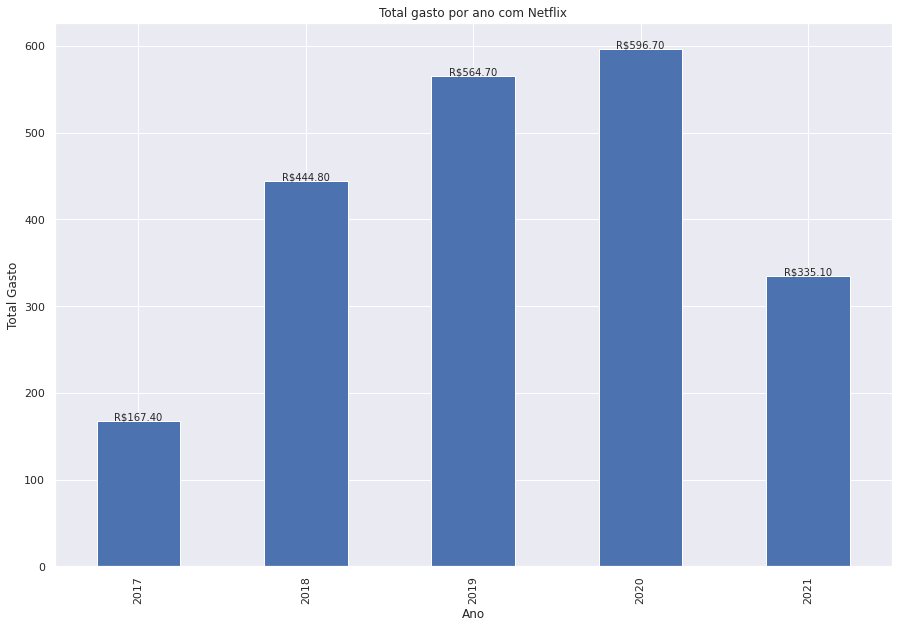

In [ ]:
# Grafico Total gasto por ano com a assinatura
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total gasto por ano com Netflix')
gasto_assinatura_por_ano["Gross_Sale_Amt"].plot.bar()

for index, data in enumerate(gasto_assinatura_por_ano["Gross_Sale_Amt"]):
    plt.text(x=index , y=data+1, s=f"R${data:.2f}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Ano')
plt.ylabel('Total Gasto')

plt.show()

In [ ]:
# Cobranças duplicadas do netflix no mesmo mês
cobrancas_duplicadas = df_netflix_billing_history[df_netflix_billing_history.duplicated(subset=['year', 'month'], keep=False)]
cobrancas_duplicadas

,Transaction_Date,Payment_Type,Item_Price_Amt,Gross_Sale_Amt,Tax_Amt,Pmt_Status,year,month
13,2021-03-08,MASTERCARD,32.9,32.9,3.70,APPROVED,2021,3
14,2021-03-08,MASTERCARD,32.9,32.9,3.70,APPROVED,2021,3
24,2021-02-09,MASTERCARD,45.9,45.9,5.16,APPROVED,2021,2
25,2021-02-09,MASTERCARD,45.9,45.9,5.16,APPROVED,2021,2
52,2020-02-08,MASTERCARD,45.9,45.9,5.16,APPROVED,2020,2
57,2020-02-08,MASTERCARD,45.9,45.9,5.16,APPROVED,2020,2
64,2019-11-08,MASTERCARD,45.9,45.9,5.16,APPROVED,2019,11
66,2019-11-08,MASTERCARD,45.9,45.9,5.16,APPROVED,2019,11
131,2017-09-09,AMEX,27.9,27.9,2.58,APPROVED,2017,9
134,2017-09-08,AMEX,27.9,27.9,2.58,APPROVED,2017,9


In [ ]:
# mensalidades que não deveriam ter sido cobradas
df_netflix_billing_history[df_netflix_billing_history.duplicated(subset=['year', 'month'])]

,Transaction_Date,Payment_Type,Item_Price_Amt,Gross_Sale_Amt,Tax_Amt,Pmt_Status,year,month
14,2021-03-08,MASTERCARD,32.9,32.9,3.70,APPROVED,2021,3
25,2021-02-09,MASTERCARD,45.9,45.9,5.16,APPROVED,2021,2
57,2020-02-08,MASTERCARD,45.9,45.9,5.16,APPROVED,2020,2
66,2019-11-08,MASTERCARD,45.9,45.9,5.16,APPROVED,2019,11
134,2017-09-08,AMEX,27.9,27.9,2.58,APPROVED,2017,9


In [ ]:
# Valor total cobrado duplamento da assinatura que não deveria ter sido cobrado
valor = df_netflix_billing_history[df_netflix_billing_history.duplicated(subset=['year', 'month'])].Gross_Sale_Amt.sum()
print(f'Valor total cobrado duplamento da assinatura: R${valor}')

Valor total cobrado duplamento da assinatura: R$198.5


# Limpeza de dados Netflix (IpAddresses)

In [ ]:
df_netflix_ip_addresses = pd.read_csv('IpAddresses.csv')
df_netflix_ip_addresses.head()

,Esn,Country,Localized Device Description,Device Description,Ip,Region Code Display Name,Ts
0,NFCDCH-02-H910KD0CXQ2TALEY7P3GNF5J09RHTF,BR,Chrome PC (Cadmium),Chrome PC (Cadmium),177.188.69.188,São Paulo,2021-07-19T02:52:53.003Z
1,SSTV-NVT5-0000000000000030712222,BR,Samsung 2015 NT14M DTV Smart TV,Samsung 2015 NT14M DTV Smart TV,177.188.69.188,São Paulo,2021-07-19T02:40:47.838Z
2,SSTV-NVT5-0000000000000030712222,BR,Samsung 2015 NT14M DTV Smart TV,Samsung 2015 NT14M DTV Smart TV,177.188.69.188,São Paulo,2021-07-18T19:12:16.705Z
3,NFAPPL-02-IPHONE12=1-77C8A28075BDA68E094F78289...,BR,Apple iPhone 11,Apple iPhone 11,191.7.171.254,São Paulo,2021-07-17T06:03:33.448Z
4,NFAPPL-02-IPHONE12=1-77C8A28075BDA68E094F78289...,BR,Apple iPhone 11,Apple iPhone 11,2804:389:2014:1296:281c:d48:f18a:dd49,São Paulo,2021-07-17T04:28:37.006Z


In [ ]:
df_netflix_ip_addresses = df_netflix_ip_addresses.rename(columns={
    "Device Description": "Device_Description",
    "Region Code Display Name": "Region_Name",
    "Ts": "Timestamp"
    })
df_netflix_ip_addresses = df_netflix_ip_addresses[['Device_Description', 'Region_Name', 'Timestamp']]

In [ ]:
df_netflix_ip_addresses.head()

,Device_Description,Region_Name,Timestamp
0,Chrome PC (Cadmium),São Paulo,2021-07-19T02:52:53.003Z
1,Samsung 2015 NT14M DTV Smart TV,São Paulo,2021-07-19T02:40:47.838Z
2,Samsung 2015 NT14M DTV Smart TV,São Paulo,2021-07-18T19:12:16.705Z
3,Apple iPhone 11,São Paulo,2021-07-17T06:03:33.448Z
4,Apple iPhone 11,São Paulo,2021-07-17T04:28:37.006Z


In [ ]:
df_netflix_ip_addresses.shape

(771, 3)

In [ ]:
df_netflix_ip_addresses['Timestamp'] = pd.to_datetime(df_netflix_ip_addresses['Timestamp'])

In [ ]:
# extraido ano, mes, dia e nome do dia a partir do timestamp
df_netflix_ip_addresses['year'] = pd.DatetimeIndex(df_netflix_ip_addresses['Timestamp']).year
df_netflix_ip_addresses['month'] = pd.DatetimeIndex(df_netflix_ip_addresses['Timestamp']).month
df_netflix_ip_addresses['day'] = pd.DatetimeIndex(df_netflix_ip_addresses['Timestamp']).day
df_netflix_ip_addresses['day_name'] = df_netflix_ip_addresses['Timestamp'].dt.day_name()
df_netflix_ip_addresses.head()

,Device_Description,Region_Name,Timestamp,year,month,day,day_name
0,Chrome PC (Cadmium),São Paulo,2021-07-19 02:52:53.003000+00:00,2021,7,19,Monday
1,Samsung 2015 NT14M DTV Smart TV,São Paulo,2021-07-19 02:40:47.838000+00:00,2021,7,19,Monday
2,Samsung 2015 NT14M DTV Smart TV,São Paulo,2021-07-18 19:12:16.705000+00:00,2021,7,18,Sunday
3,Apple iPhone 11,São Paulo,2021-07-17 06:03:33.448000+00:00,2021,7,17,Saturday
4,Apple iPhone 11,São Paulo,2021-07-17 04:28:37.006000+00:00,2021,7,17,Saturday


In [ ]:
# criando nova coluna com a categoria da parte do dia (cedo da manhã, manhã, noite, etc)
def get_part_of_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

df_netflix_ip_addresses['part_of_day'] = df_netflix_ip_addresses['Timestamp'].dt.hour.apply(get_part_of_day)

In [ ]:
# mudando valores coluna mês para seus devidos nomes
month = {	
    1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'		
}

df_netflix_ip_addresses["month"].replace(month, inplace=True)
df_netflix_ip_addresses.head()

,Device_Description,Region_Name,Timestamp,year,month,day,day_name,part_of_day
0,Chrome PC (Cadmium),São Paulo,2021-07-19 02:52:53.003000+00:00,2021,July,19,Monday,Late Night
1,Samsung 2015 NT14M DTV Smart TV,São Paulo,2021-07-19 02:40:47.838000+00:00,2021,July,19,Monday,Late Night
2,Samsung 2015 NT14M DTV Smart TV,São Paulo,2021-07-18 19:12:16.705000+00:00,2021,July,18,Sunday,Evening
3,Apple iPhone 11,São Paulo,2021-07-17 06:03:33.448000+00:00,2021,July,17,Saturday,Early Morning
4,Apple iPhone 11,São Paulo,2021-07-17 04:28:37.006000+00:00,2021,July,17,Saturday,Late Night


In [ ]:
df_netflix_ip_addresses.to_csv('df_netflix_ip_addresses.csv')

# Análise exploratória Netflix (IpAddresses)

In [ ]:
df_netflix_ip_addresses = pd.read_csv('df_netflix_ip_addresses.csv', index_col=[0])
df_netflix_ip_addresses['Timestamp'] = pd.to_datetime(df_netflix_ip_addresses['Timestamp'])
df_netflix_ip_addresses.head()

,Device_Description,Region_Name,Timestamp,year,month,day,day_name,part_of_day
0,Chrome PC (Cadmium),São Paulo,2021-07-19 02:52:53.003000+00:00,2021,July,19,Monday,Late Night
1,Samsung 2015 NT14M DTV Smart TV,São Paulo,2021-07-19 02:40:47.838000+00:00,2021,July,19,Monday,Late Night
2,Samsung 2015 NT14M DTV Smart TV,São Paulo,2021-07-18 19:12:16.705000+00:00,2021,July,18,Sunday,Evening
3,Apple iPhone 11,São Paulo,2021-07-17 06:03:33.448000+00:00,2021,July,17,Saturday,Early Morning
4,Apple iPhone 11,São Paulo,2021-07-17 04:28:37.006000+00:00,2021,July,17,Saturday,Late Night


In [ ]:
df_netflix_ip_addresses.shape

(771, 8)

In [ ]:
df_netflix_ip_addresses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 770
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Device_Description  771 non-null    object             
 1   Region_Name         771 non-null    object             
 2   Timestamp           771 non-null    datetime64[ns, UTC]
 3   year                771 non-null    int64              
 4   month               771 non-null    object             
 5   day                 771 non-null    int64              
 6   day_name            771 non-null    object             
 7   part_of_day         771 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 54.2+ KB


In [ ]:
# Total de acessos por dispositivo
total_acessos_por_dispositivos = df_netflix_ip_addresses['Device_Description'].value_counts().to_frame()
total_acessos_por_dispositivos = total_acessos_por_dispositivos.rename(columns={"Device_Description": "Access_Number"})
total_acessos_por_dispositivos

,Access_Number
Android DefaultWidevineL3Phone Android Phone,332
Samsung 2015 NT14M DTV Smart TV,143
Apple iPhone 11,136
DefaultWidevineAndroidPhone,85
Chrome PC (Cadmium),32
Netflix Windows App - Cadmium Windows Mobile,20
Netflix Chrome Linux (Cadmium) HTML 5,17
Netflix Chrome MAC (Cadmium) HTML 5,3
Safari MAC (Cadmium),3


In [ ]:
print(f"Número total de acessos no Netflix: {total_acessos_por_dispositivos['Access_Number'].sum()}")

Número total de acessos no Netflix: 771


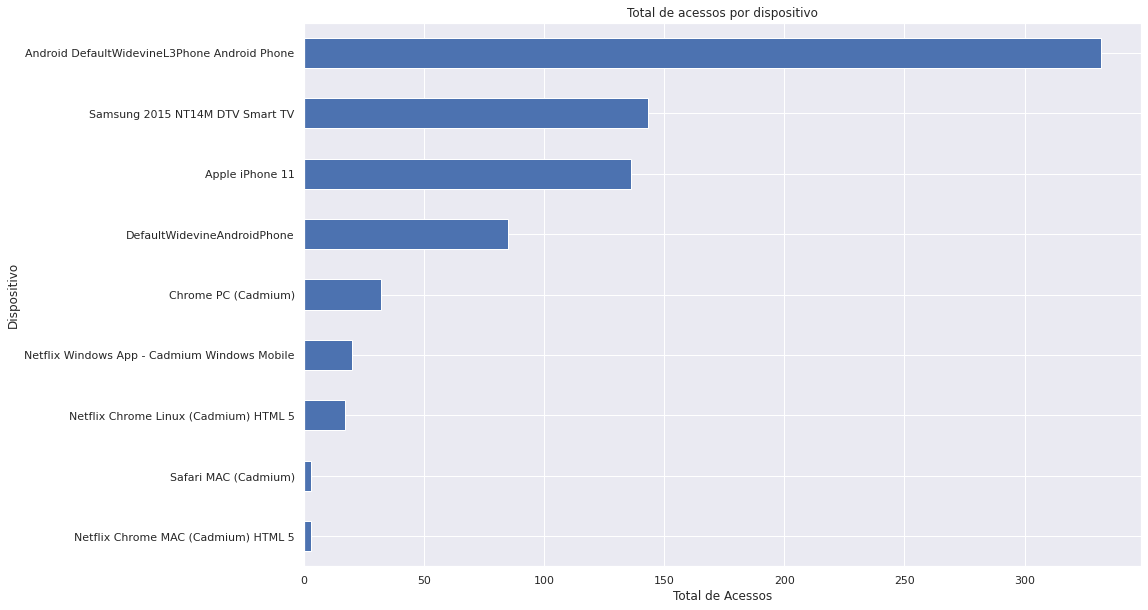

In [ ]:
# Grafico Total de acessos por dispositivo
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total de acessos por dispositivo')
total_acessos_por_dispositivos['Access_Number'].sort_values(ascending=True).plot.barh()

plt.xlabel('Total de Acessos')
plt.ylabel('Dispositivo')

plt.show()

In [ ]:
df_netflix_ip_addresses['Region_Name'].value_counts()

São Paulo         769
Santa Catarina      1
Texas               1
Name: Region_Name, dtype: int64

In [ ]:
# Total acessos por ano
acessos_por_ano = df_netflix_ip_addresses['year'].value_counts()
acessos_por_ano = acessos_por_ano.to_frame()
acessos_por_ano = acessos_por_ano.rename(columns={"year": "Access_Number"})
acessos_por_ano

,Access_Number
2020,290
2021,235
2019,167
2018,79


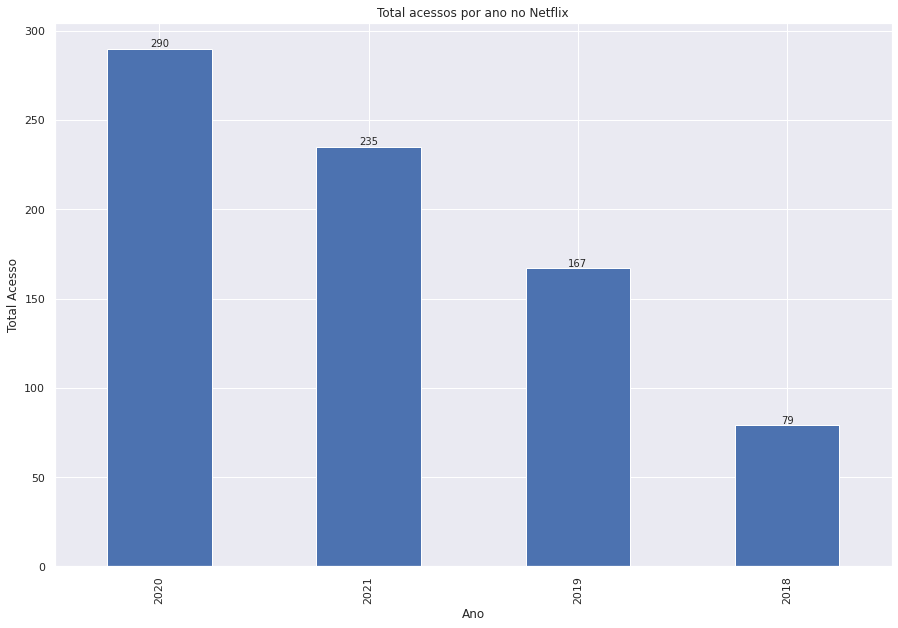

In [ ]:
# Grafico Total acessos por ano
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por ano no Netflix')
acessos_por_ano["Access_Number"].plot.bar()

for index, data in enumerate(acessos_por_ano["Access_Number"]):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Ano')
plt.ylabel('Total Acesso')

plt.show()

In [ ]:
# Total acessos por mês
acessos_por_mes = df_netflix_ip_addresses['month'].value_counts()
acessos_por_mes = acessos_por_mes.to_frame()
acessos_por_mes = acessos_por_mes.rename(columns={"month": "Access_Number"})
acessos_por_mes

,Access_Number
April,87
March,86
May,81
February,79
December,76
November,70
June,69
January,63
July,58
September,36


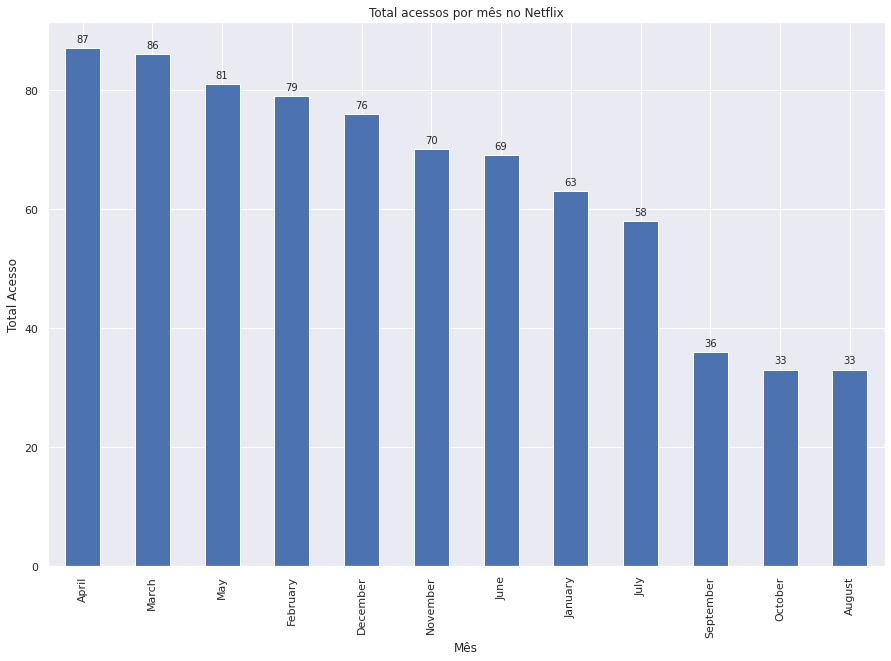

In [ ]:
# Grafico Total acessos por mês
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por mês no Netflix')
acessos_por_mes["Access_Number"].plot.bar()

for index, data in enumerate(acessos_por_mes["Access_Number"]):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Mês')
plt.ylabel('Total Acesso')

plt.show()

In [ ]:
# Total acessos por day_name
acessos_por_day_name = df_netflix_ip_addresses['day_name'].value_counts()
acessos_por_day_name = acessos_por_day_name.to_frame()
acessos_por_day_name = acessos_por_day_name.rename(columns={"day_name": "Access_Number"})
acessos_por_day_name

,Access_Number
Monday,123
Sunday,121
Wednesday,119
Saturday,115
Thursday,103
Friday,96
Tuesday,94


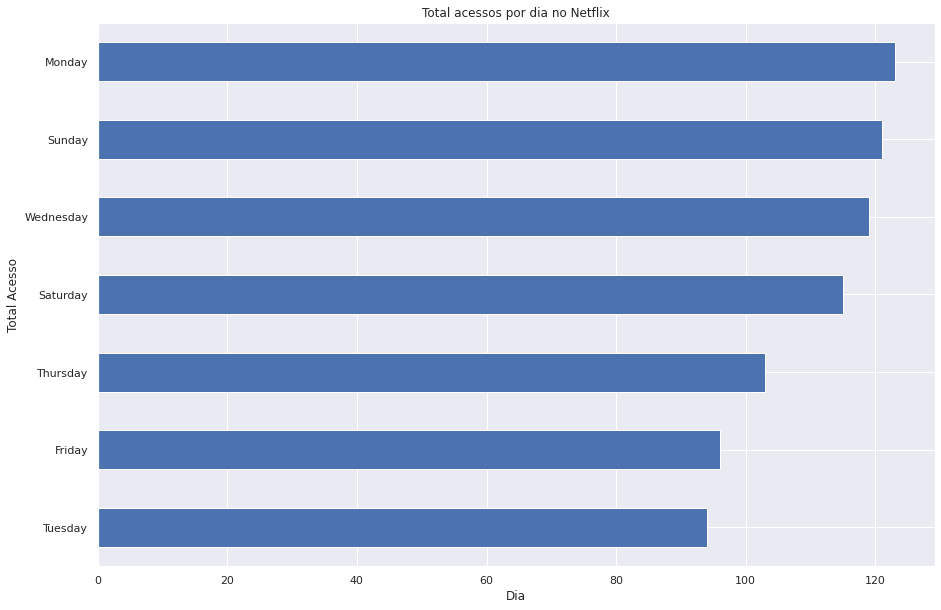

In [ ]:
# Grafico Total acessos por day_name
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por dia no Netflix')
acessos_por_day_name["Access_Number"].sort_values(ascending=True).plot.barh()

plt.xlabel('Dia')
plt.ylabel('Total Acesso')

plt.show()

In [ ]:
acessos_por_part_of_day = df_netflix_ip_addresses['part_of_day'].value_counts()
percentual_part_of_day = df_netflix_ip_addresses['part_of_day'].value_counts(normalize = True) * 100
dist_freq_part_of_day = pd.DataFrame({'Access_Number': acessos_por_part_of_day, 'Percentage (%)': percentual_part_of_day})

dist_freq_part_of_day

,Access_Number,Percentage (%)
Late Night,229,29.701686
Evening,171,22.178988
Night,145,18.806744
Noon,128,16.601816
Early Morning,70,9.079118
Morning,28,3.631647


In [ ]:
'''
part_of_day
hora > 4 and hora <= 8:Early Morning
hora > 8 and hora <= 12:Morning
hora > 12 and hora <= 16:Noon
hora > 16 and hora <= 20: Evening
hora > 20 and hora <= 24: Night
hora <= 4: Late Night
'''

part_of_day_dict = {
    'Early Morning': 0,
    'Morning': 0,
    'Noon': 0,
    'Evening': 0,
    'Night': 0,
    'Late Night': 0
}

part_of_day_dict["Early Morning"] = dist_freq_part_of_day['Access_Number']['Early Morning']
part_of_day_dict["Morning"] = dist_freq_part_of_day['Access_Number']['Morning']
part_of_day_dict["Noon"] = dist_freq_part_of_day['Access_Number']['Noon']
part_of_day_dict["Evening"] = dist_freq_part_of_day['Access_Number']['Evening']
part_of_day_dict["Night"] = dist_freq_part_of_day['Access_Number']['Night']
part_of_day_dict["Late Night"] = dist_freq_part_of_day['Access_Number']['Late Night']

acessos_por_part_of_day = pd.DataFrame.from_dict(part_of_day_dict, orient='index', columns=['Access_Number'])
acessos_por_part_of_day

,Access_Number
Early Morning,70
Morning,28
Noon,128
Evening,171
Night,145
Late Night,229


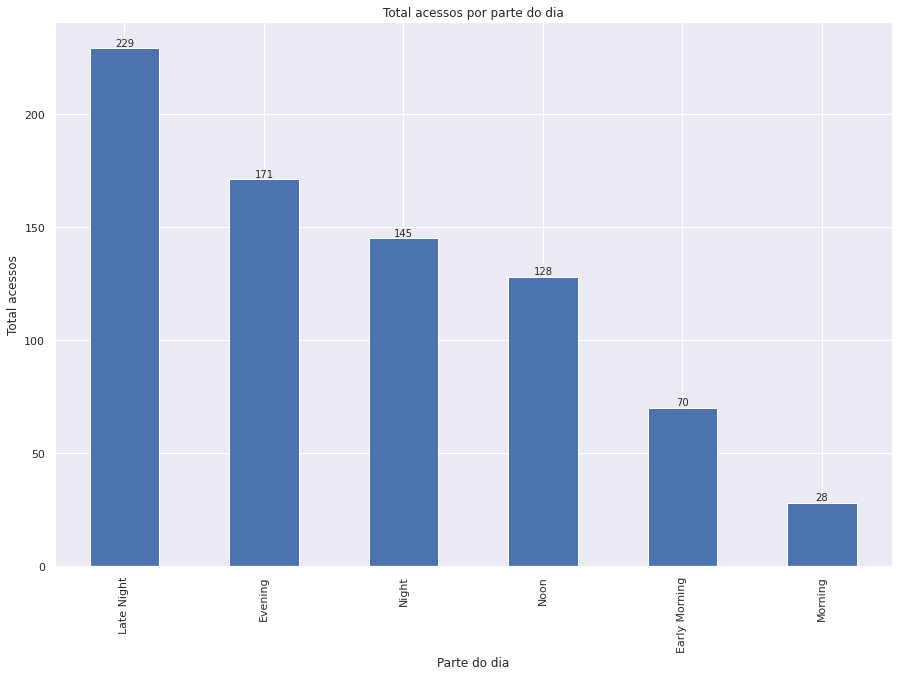

In [ ]:
# grafico Total acessos por part_of_day
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por parte do dia')
acessos_por_part_of_day['Access_Number'].sort_values(ascending=False).plot.bar()

for index, data in enumerate(acessos_por_part_of_day['Access_Number'].sort_values(ascending=False)):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Parte do dia')
plt.ylabel('Total acessos')

plt.show()

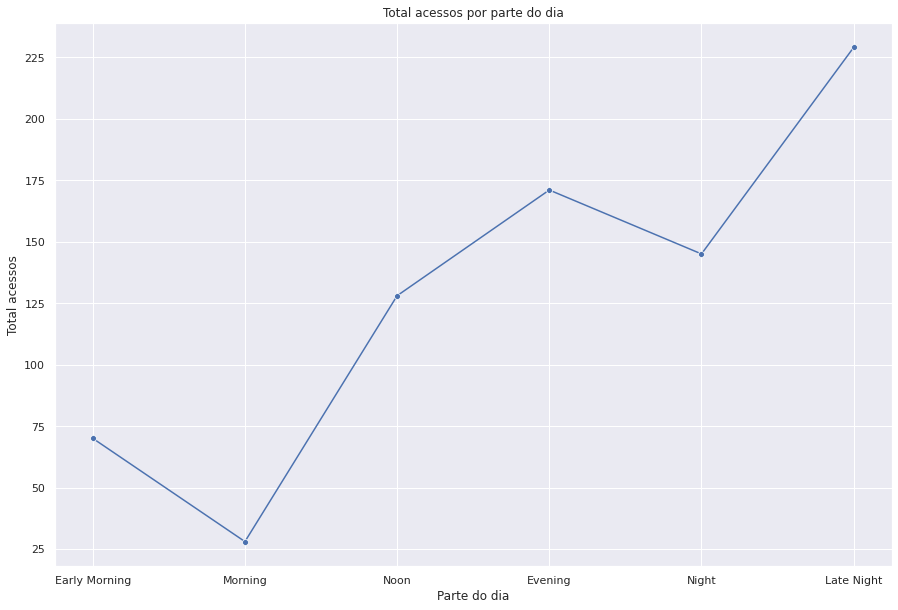

In [ ]:
# grafico Total acessos por part_of_day
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por parte do dia')
sns.lineplot(data=acessos_por_part_of_day, x=acessos_por_part_of_day.index, y=acessos_por_part_of_day['Access_Number'], marker="o")

plt.xlabel('Parte do dia')
plt.ylabel('Total acessos')

plt.show()

'''
part_of_day
hora > 4 and hora <= 8:Early Morning
hora > 8 and hora <= 12:Morning
hora > 12 and hora <= 16:Noon
hora > 16 and hora <= 20: Evening
hora > 20 and hora <= 24: Night
hora <= 4: Late Night
'''

# Limpeza de dados Netflix (IndicatedPreferences) + Análise Exploratória

In [ ]:
pd.read_csv('IndicatedPreferences.csv')

,Profile Name,Show,Has Watched,Is Interested,Event Date
0,Alesandra,Two and a Half Men,True,False,2017-08-10
1,Alesandra,Grey's Anatomy,True,False,2017-08-10
2,Alesandra,Orange Is the New Black,True,False,2017-08-10
3,Vanessa,The Crown,NaN,NaN,2021-03-13
4,Vanessa,Money Heist,NaN,NaN,2021-03-13
5,Vanessa,I Care a Lot,NaN,NaN,2021-03-13
6,natascha,13 Reasons Why,True,False,2017-08-09
7,natascha,Orange Is the New Black,True,False,2017-08-09
8,natascha,The Vampire Diaries,True,False,2017-08-09
9,natascha,Pretty Little Liars,True,False,2017-08-09


In [ ]:
df_netflix_indicated_preferences = pd.read_csv('IndicatedPreferences.csv')
df_netflix_indicated_preferences = df_netflix_indicated_preferences.rename(columns={
    "Profile Name": "Profile_Name",
    "Has Watched": "Has_Watched",
    "Is Interested": "Is_Interested",
    "Event Date": "Event_Date"
    })
df_netflix_indicated_preferences = df_netflix_indicated_preferences.query("Profile_Name == 'natascha'")
df_netflix_indicated_preferences

,Profile_Name,Show,Has_Watched,Is_Interested,Event_Date
6,natascha,13 Reasons Why,True,False,2017-08-09
7,natascha,Orange Is the New Black,True,False,2017-08-09
8,natascha,The Vampire Diaries,True,False,2017-08-09
9,natascha,Pretty Little Liars,True,False,2017-08-09
10,natascha,Grey's Anatomy,True,False,2017-08-09


In [ ]:
df_netflix_indicated_preferences.to_csv('df_netflix_indicated_preferences.csv')

In [ ]:
# numero de titulos assistidos no indicated_preferences = 5
df_netflix_indicated_preferences.Has_Watched.value_counts()

True    5
Name: Has_Watched, dtype: int64

# Limpeza de dados Netflix (Ratings) + Análise Exploratória

In [ ]:
pd.read_csv('Ratings.csv')

,Profile Name,Title Name,Rating Type,Star Value,Thumbs Value,Device Model,Event Utc Ts,Region View Date
0,natascha,The Half Of It,thumb,NaN,2,iPhone,2020-05-01 10:38:39,NaN
1,natascha,Eternal Sunshine of the Spotless Mind,thumb,NaN,2,iPhone,2020-04-07 07:06:53,NaN
2,natascha,My Days of Mercy,thumb,NaN,2,iPhone,2020-02-13 12:14:31,NaN
3,natascha,The Miseducation of Cameron Post,thumb,NaN,2,iPhone,2020-02-13 12:14:22,NaN
4,natascha,Unbelievable,thumb,NaN,2,HTML 5,2020-01-25 18:38:59,NaN
5,natascha,MINDHUNTER,thumb,NaN,2,HTML 5,2020-01-25 18:38:55,NaN
6,natascha,Wynonna Earp,thumb,NaN,2,iPhone,2019-12-21 07:19:14,NaN
7,natascha,13 Reasons Why,thumb,NaN,1,iPhone,2019-12-21 07:18:52,NaN
8,natascha,Young & Beautiful,thumb,NaN,1,iPhone,2019-10-25 05:56:01,NaN
9,natascha,Carol,thumb,NaN,2,HTML 5,2019-07-08 08:51:39,NaN


In [ ]:
df_netflix_ratings = pd.read_csv('Ratings.csv')
df_netflix_ratings = df_netflix_ratings.rename(columns={
    "Profile Name": "Profile_Name",
    "Title Name": "Title_Name",
    "Rating Type": "Rating_Type",
    "Star Value": "Star_Value",
    "Thumbs Value": "Thumbs_Value",
    "Event Utc Ts": "Timestamp"
    })
df_netflix_ratings = df_netflix_ratings.query("Profile_Name == 'natascha'")
df_netflix_ratings.drop(['Device Model', 'Region View Date'], axis=1, inplace=True)
df_netflix_ratings

,Profile_Name,Title_Name,Rating_Type,Star_Value,Thumbs_Value,Timestamp
0,natascha,The Half Of It,thumb,NaN,2,2020-05-01 10:38:39
1,natascha,Eternal Sunshine of the Spotless Mind,thumb,NaN,2,2020-04-07 07:06:53
2,natascha,My Days of Mercy,thumb,NaN,2,2020-02-13 12:14:31
3,natascha,The Miseducation of Cameron Post,thumb,NaN,2,2020-02-13 12:14:22
4,natascha,Unbelievable,thumb,NaN,2,2020-01-25 18:38:59
5,natascha,MINDHUNTER,thumb,NaN,2,2020-01-25 18:38:55
6,natascha,Wynonna Earp,thumb,NaN,2,2019-12-21 07:19:14
7,natascha,13 Reasons Why,thumb,NaN,1,2019-12-21 07:18:52
8,natascha,Young & Beautiful,thumb,NaN,1,2019-10-25 05:56:01
9,natascha,Carol,thumb,NaN,2,2019-07-08 08:51:39


In [ ]:
# numero de titulos por thumbs_value maximo 2
print(f"Número de titulos com rating maximo: {len(df_netflix_ratings.query('Thumbs_Value == 2'))}")

Número de titulos com rating maximo: 14


In [ ]:
df_netflix_ratings.query('Thumbs_Value == 2')

,Profile_Name,Title_Name,Rating_Type,Star_Value,Thumbs_Value,Timestamp
0,natascha,The Half Of It,thumb,NaN,2,2020-05-01 10:38:39
1,natascha,Eternal Sunshine of the Spotless Mind,thumb,NaN,2,2020-04-07 07:06:53
2,natascha,My Days of Mercy,thumb,NaN,2,2020-02-13 12:14:31
3,natascha,The Miseducation of Cameron Post,thumb,NaN,2,2020-02-13 12:14:22
4,natascha,Unbelievable,thumb,NaN,2,2020-01-25 18:38:59
5,natascha,MINDHUNTER,thumb,NaN,2,2020-01-25 18:38:55
6,natascha,Wynonna Earp,thumb,NaN,2,2019-12-21 07:19:14
9,natascha,Carol,thumb,NaN,2,2019-07-08 08:51:39
10,natascha,Instant Hotel,thumb,NaN,2,2019-06-30 21:47:13
12,natascha,Billy Elliot,thumb,NaN,2,2019-06-19 08:40:49


In [ ]:
# numero de titulos por thumbs_value maximo 1
print(f"Número de titulos com rating baixo: {len(df_netflix_ratings.query('Thumbs_Value == 1'))}")

Número de titulos com rating baixo: 3


In [ ]:
df_netflix_ratings.query('Thumbs_Value == 1')

,Profile_Name,Title_Name,Rating_Type,Star_Value,Thumbs_Value,Timestamp
7,natascha,13 Reasons Why,thumb,NaN,1,2019-12-21 07:18:52
8,natascha,Young & Beautiful,thumb,NaN,1,2019-10-25 05:56:01
11,natascha,ROMA,thumb,NaN,1,2019-06-19 08:40:55


# Limpeza de dados Netflix (ViewingActivity)

In [ ]:
df_netflix_viewing_activity = pd.read_csv('ViewingActivity.csv')
df_netflix_viewing_activity.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Alesandra,2021-07-19 03:20:14,00:37:00,Autoplayed: user action: None;,"Roubos Inacreditáveis: Temporada 1: Sexo, dinh...",NaN,Samsung 2015 NT14M DTV Smart TV,00:37:04,00:37:04,BR (Brazil)
1,Alesandra,2021-07-19 02:40:47,00:39:12,Autoplayed: user action: User_Interaction;,"Roubos Inacreditáveis: Temporada 1: Sexo, dinh...",NaN,Samsung 2015 NT14M DTV Smart TV,00:39:12,00:39:12,BR (Brazil)
2,Alesandra,2021-07-19 00:48:49,01:49:01,Autoplayed: user action: User_Interaction;,Estômago,NaN,Samsung 2015 NT14M DTV Smart TV,01:49:01,01:49:01,BR (Brazil)
3,Alesandra,2021-07-18 23:16:11,01:25:38,Autoplayed: user action: User_Interaction;,Invasão,NaN,Samsung 2015 NT14M DTV Smart TV,01:25:38,01:25:38,BR (Brazil)
4,Alesandra,2021-07-18 21:17:47,01:44:31,Autoplayed: user action: User_Interaction;,Águas que Corroem,NaN,Samsung 2015 NT14M DTV Smart TV,01:44:06,01:44:06,BR (Brazil)


In [ ]:
df_netflix_viewing_activity["Supplemental Video Type"].unique()

array([nan, 'RECAP', 'TEASER_TRAILER', 'TRAILER', 'HOOK', 'PROMOTIONAL',
       'TUTORIAL', 'BONUS_VIDEO', 'PREVIEW'], dtype=object)

In [ ]:
df_netflix_viewing_activity = df_netflix_viewing_activity.rename(columns={
    "Profile Name": "Profile_Name",
    "Start Time": "Start_Time",
    "Supplemental Video Type": "Supplemental_Video_Type",
    "Device Type": "Device_Type",
    "Latest Bookmark": "Latest_Bookmark",
    })

df_netflix_viewing_activity = df_netflix_viewing_activity.query("Profile_Name == 'natascha'")
# selecionar as colunas certas
df_netflix_viewing_activity = df_netflix_viewing_activity[[ 
                              'Start_Time', 
                              'Duration', 
                              'Title',
                              'Supplemental_Video_Type', 
                              'Device_Type',
                              'Bookmark',
                              'Latest_Bookmark',
                              'Country'
                              ]]
df_netflix_viewing_activity.head()

,Start_Time,Duration,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country
7199,2021-07-09 22:49:40,01:39:00,Rua do Medo: 1994 – Parte 1,NaN,Safari MAC (Cadmium),01:39:00,01:39:00,BR (Brazil)
7200,2021-07-09 22:46:12,00:02:34,Trilogia Rua do Medo (Trailer),TRAILER,Safari MAC (Cadmium),00:02:34,00:02:34,BR (Brazil)
7201,2021-06-07 03:11:10,00:24:36,Feel Good: Temporada 1 (Channel 4): Episódio 1...,NaN,Safari MAC (Cadmium),00:24:36,00:24:36,BR (Brazil)
7202,2021-06-07 03:10:40,00:00:17,Temporada 1 (Clipe 1): Sweet Tooth,HOOK,Safari MAC (Cadmium),00:00:17,00:00:17,BR (Brazil)
7203,2021-06-07 02:56:52,00:00:09,Season 2 Direct Lift Hook 2: Feel Good,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:09,00:00:09,BR (Brazil)


In [ ]:
df_netflix_viewing_activity.shape

(2722, 8)

In [ ]:
df_netflix_viewing_activity['Start_Time'] = pd.to_datetime(df_netflix_viewing_activity['Start_Time'])

In [ ]:
# extraido ano, mes, dia e nome do dia a partir do timestamp
df_netflix_viewing_activity['year'] = pd.DatetimeIndex(df_netflix_viewing_activity['Start_Time']).year
df_netflix_viewing_activity['month'] = pd.DatetimeIndex(df_netflix_viewing_activity['Start_Time']).month
df_netflix_viewing_activity['day'] = pd.DatetimeIndex(df_netflix_viewing_activity['Start_Time']).day
df_netflix_viewing_activity['day_name'] = df_netflix_viewing_activity['Start_Time'].dt.day_name()
df_netflix_viewing_activity.head()

,Start_Time,Duration,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country,year,month,day,day_name
7199,2021-07-09 22:49:40,01:39:00,Rua do Medo: 1994 – Parte 1,NaN,Safari MAC (Cadmium),01:39:00,01:39:00,BR (Brazil),2021,7,9,Friday
7200,2021-07-09 22:46:12,00:02:34,Trilogia Rua do Medo (Trailer),TRAILER,Safari MAC (Cadmium),00:02:34,00:02:34,BR (Brazil),2021,7,9,Friday
7201,2021-06-07 03:11:10,00:24:36,Feel Good: Temporada 1 (Channel 4): Episódio 1...,NaN,Safari MAC (Cadmium),00:24:36,00:24:36,BR (Brazil),2021,6,7,Monday
7202,2021-06-07 03:10:40,00:00:17,Temporada 1 (Clipe 1): Sweet Tooth,HOOK,Safari MAC (Cadmium),00:00:17,00:00:17,BR (Brazil),2021,6,7,Monday
7203,2021-06-07 02:56:52,00:00:09,Season 2 Direct Lift Hook 2: Feel Good,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:09,00:00:09,BR (Brazil),2021,6,7,Monday


In [ ]:
# criando nova coluna com a categoria da parte do dia (cedo da manhã, manhã, noite, etc)
def get_part_of_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

df_netflix_viewing_activity['part_of_day'] = df_netflix_viewing_activity['Start_Time'].dt.hour.apply(get_part_of_day)

In [ ]:
# mudando valores coluna mês para seus devidos nomes
month = {	
    1:'January',
		2:'February',
		3:'March',
		4:'April',
		5:'May',
		6:'June',
		7:'July',
		8:'August',
		9:'September',
		10:'October',
		11:'November',
		12:'December'		
}

df_netflix_viewing_activity["month"].replace(month, inplace=True)
df_netflix_viewing_activity.head()

,Start_Time,Duration,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country,year,month,day,day_name,part_of_day
7199,2021-07-09 22:49:40,01:39:00,Rua do Medo: 1994 – Parte 1,NaN,Safari MAC (Cadmium),01:39:00,01:39:00,BR (Brazil),2021,July,9,Friday,Night
7200,2021-07-09 22:46:12,00:02:34,Trilogia Rua do Medo (Trailer),TRAILER,Safari MAC (Cadmium),00:02:34,00:02:34,BR (Brazil),2021,July,9,Friday,Night
7201,2021-06-07 03:11:10,00:24:36,Feel Good: Temporada 1 (Channel 4): Episódio 1...,NaN,Safari MAC (Cadmium),00:24:36,00:24:36,BR (Brazil),2021,June,7,Monday,Late Night
7202,2021-06-07 03:10:40,00:00:17,Temporada 1 (Clipe 1): Sweet Tooth,HOOK,Safari MAC (Cadmium),00:00:17,00:00:17,BR (Brazil),2021,June,7,Monday,Late Night
7203,2021-06-07 02:56:52,00:00:09,Season 2 Direct Lift Hook 2: Feel Good,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:09,00:00:09,BR (Brazil),2021,June,7,Monday,Late Night


In [ ]:
# limpando o titulo
def clean_title(text):
  if len(text.split(':')) <= 3:
    return ' '.join(text.split(':')[:1])
  else:
    return ' '.join(text.split(':')[:2])

df_netflix_viewing_activity['clean_title'] = df_netflix_viewing_activity['Title'].apply(clean_title)

In [ ]:
df_netflix_viewing_activity.head()

,Start_Time,Duration,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country,year,month,day,day_name,part_of_day,clean_title
7199,2021-07-09 22:49:40,01:39:00,Rua do Medo: 1994 – Parte 1,NaN,Safari MAC (Cadmium),01:39:00,01:39:00,BR (Brazil),2021,July,9,Friday,Night,Rua do Medo
7200,2021-07-09 22:46:12,00:02:34,Trilogia Rua do Medo (Trailer),TRAILER,Safari MAC (Cadmium),00:02:34,00:02:34,BR (Brazil),2021,July,9,Friday,Night,Trilogia Rua do Medo (Trailer)
7201,2021-06-07 03:11:10,00:24:36,Feel Good: Temporada 1 (Channel 4): Episódio 1...,NaN,Safari MAC (Cadmium),00:24:36,00:24:36,BR (Brazil),2021,June,7,Monday,Late Night,Feel Good
7202,2021-06-07 03:10:40,00:00:17,Temporada 1 (Clipe 1): Sweet Tooth,HOOK,Safari MAC (Cadmium),00:00:17,00:00:17,BR (Brazil),2021,June,7,Monday,Late Night,Temporada 1 (Clipe 1)
7203,2021-06-07 02:56:52,00:00:09,Season 2 Direct Lift Hook 2: Feel Good,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:09,00:00:09,BR (Brazil),2021,June,7,Monday,Late Night,Season 2 Direct Lift Hook 2


In [ ]:
df_netflix_viewing_activity[['Title', 'clean_title']]

,Title,clean_title
7199,Rua do Medo: 1994 – Parte 1,Rua do Medo
7200,Trilogia Rua do Medo (Trailer),Trilogia Rua do Medo (Trailer)
7201,Feel Good: Temporada 1 (Channel 4): Episódio 1...,Feel Good
7202,Temporada 1 (Clipe 1): Sweet Tooth,Temporada 1 (Clipe 1)
7203,Season 2 Direct Lift Hook 2: Feel Good,Season 2 Direct Lift Hook 2
...,...,...
9916,"A Anatomia de Grey: Temporada 1: Longa noite, ...",A Anatomia de Grey
9917,"A Anatomia de Grey: Temporada 1: Longa noite, ...",A Anatomia de Grey
9918,MINDHUNTER: Temporada 1: Episódio 1 (Episódio 1),MINDHUNTER
9919,Star Trek: Discovery: Temporada 1: O olá vulca...,Star Trek Discovery


In [ ]:
df_netflix_viewing_activity.query("clean_title == 'MINDHUNTER'")

,Start_Time,Duration,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country,year,month,day,day_name,part_of_day,clean_title
8129,2019-08-17 23:12:50,01:09:24,MINDHUNTER: Temporada 2: Episódio 9 (Episódio 9),NaN,Chrome PC (Cadmium),01:11:19,01:11:19,BR (Brazil),2019,August,17,Saturday,Night,MINDHUNTER
8130,2019-08-17 22:02:50,00:42:09,MINDHUNTER: Temporada 2: Episódio 8 (Episódio 8),NaN,Chrome PC (Cadmium),00:50:39,00:50:39,BR (Brazil),2019,August,17,Saturday,Night,MINDHUNTER
8131,2019-08-17 19:26:06,00:55:02,MINDHUNTER: Temporada 2: Episódio 7 (Episódio 7),NaN,Chrome PC (Cadmium),00:55:50,00:55:50,BR (Brazil),2019,August,17,Saturday,Evening,MINDHUNTER
8135,2019-08-17 08:55:18,00:48:10,MINDHUNTER: Temporada 2: Episódio 6 (Episódio 6),NaN,Chrome PC (Cadmium),00:56:13,00:56:13,BR (Brazil),2019,August,17,Saturday,Early Morning,MINDHUNTER
8136,2019-08-17 07:42:53,01:07:49,MINDHUNTER: Temporada 2: Episódio 5 (Episódio 5),NaN,Chrome PC (Cadmium),01:09:22,01:09:22,BR (Brazil),2019,August,17,Saturday,Early Morning,MINDHUNTER
8137,2019-08-17 06:56:45,00:45:54,MINDHUNTER: Temporada 2: Episódio 4 (Episódio 4),NaN,Chrome PC (Cadmium),00:48:36,00:48:36,BR (Brazil),2019,August,17,Saturday,Early Morning,MINDHUNTER
8138,2019-08-17 05:57:30,00:55:02,MINDHUNTER: Temporada 2: Episódio 3 (Episódio 3),NaN,Chrome PC (Cadmium),00:57:54,00:57:54,BR (Brazil),2019,August,17,Saturday,Early Morning,MINDHUNTER
8139,2019-08-17 05:14:57,00:42:25,MINDHUNTER: Temporada 2: Episódio 2 (Episódio 2),NaN,Chrome PC (Cadmium),00:43:56,00:43:56,BR (Brazil),2019,August,17,Saturday,Early Morning,MINDHUNTER
8140,2019-08-17 04:25:26,00:45:33,MINDHUNTER: Temporada 2: Episódio 1 (Episódio 1),NaN,Chrome PC (Cadmium),00:45:43,00:45:43,BR (Brazil),2019,August,17,Saturday,Late Night,MINDHUNTER
8145,2019-08-09 13:02:05,00:28:41,MINDHUNTER: Temporada 1: Episódio 10 (Episódio...,NaN,Apple iPhone 7 (GSM),00:50:15,00:50:15,BR (Brazil),2019,August,9,Friday,Noon,MINDHUNTER


In [ ]:
df_netflix_viewing_activity.to_csv('df_netflix_viewing_activity.csv')

# Análise exploratória Netflix (ViewingActivity)

In [ ]:
'''
“Profile Name” – o nome do perfil usado para assistir
“Start Time” – a data e a hora (UTC) do início da visualização
“Duration” – a duração da sessão
“Title” – a série ou o filme assistido
“Device Type” – o tipo de aparelho utilizado para acessar a série ou o filme
“Bookmark” – a posição de visualização mais recente (em relação à duração total da
série ou do filme) da sessão de reprodução específica de uma série ou um filme
“Latest Bookmark” – indica se o marcador é a posição de visualização mais recente
(em relação à duração total da série ou do filme) na sessão de reprodução mais
recente de uma série ou filme
“Country” – o país de onde a série ou o filme foi assistido
'''

In [2]:
df_netflix_viewing_activity = pd.read_csv('df_netflix_viewing_activity.csv', index_col=[0])
df_netflix_viewing_activity['Start_Time'] = pd.to_datetime(df_netflix_viewing_activity['Start_Time'], utc=True)
df_netflix_viewing_activity.head()

,Start_Time,Duration,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country,year,month,day,day_name,part_of_day,clean_title
7199,2021-07-09 22:49:40+00:00,01:39:00,Rua do Medo: 1994 – Parte 1,NaN,Safari MAC (Cadmium),01:39:00,01:39:00,BR (Brazil),2021,July,9,Friday,Night,Rua do Medo
7200,2021-07-09 22:46:12+00:00,00:02:34,Trilogia Rua do Medo (Trailer),TRAILER,Safari MAC (Cadmium),00:02:34,00:02:34,BR (Brazil),2021,July,9,Friday,Night,Trilogia Rua do Medo (Trailer)
7201,2021-06-07 03:11:10+00:00,00:24:36,Feel Good: Temporada 1 (Channel 4): Episódio 1...,NaN,Safari MAC (Cadmium),00:24:36,00:24:36,BR (Brazil),2021,June,7,Monday,Late Night,Feel Good
7202,2021-06-07 03:10:40+00:00,00:00:17,Temporada 1 (Clipe 1): Sweet Tooth,HOOK,Safari MAC (Cadmium),00:00:17,00:00:17,BR (Brazil),2021,June,7,Monday,Late Night,Temporada 1 (Clipe 1)
7203,2021-06-07 02:56:52+00:00,00:00:09,Season 2 Direct Lift Hook 2: Feel Good,HOOK,Netflix Chrome MAC (Cadmium) HTML 5,00:00:09,00:00:09,BR (Brazil),2021,June,7,Monday,Late Night,Season 2 Direct Lift Hook 2


In [ ]:
df_netflix_viewing_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 7199 to 9920
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Start_Time               2722 non-null   datetime64[ns, UTC]
 1   Duration                 2722 non-null   object             
 2   Title                    2722 non-null   object             
 3   Supplemental_Video_Type  58 non-null     object             
 4   Device_Type              2722 non-null   object             
 5   Bookmark                 2722 non-null   object             
 6   Latest_Bookmark          2722 non-null   object             
 7   Country                  2722 non-null   object             
 8   year                     2722 non-null   int64              
 9   month                    2722 non-null   object             
 10  day                      2722 non-null   int64              
 11  day_name                 27

In [ ]:
df_netflix_viewing_activity.shape

(2722, 14)

In [ ]:
# Total de acessos por dispositivo
total_acessos_por_dispositivos = df_netflix_viewing_activity['Device_Type'].value_counts().to_frame()
total_acessos_por_dispositivos = total_acessos_por_dispositivos.rename(columns={"Device_Type": "Access_Number"})
total_acessos_por_dispositivos

,Access_Number
Android DefaultWidevineL3Phone Android Phone,946
Apple iPhone 7 (GSM),903
Chrome PC (Cadmium),386
Mobile,254
Samsung 2013 MStar X12 Smart TV,104
Netflix Chrome Linux (Cadmium) HTML 5,59
Mac,23
Firefox PC (Cadmium),18
Samsung 2015 NT14M DTV Smart TV,17
Netflix Chrome MAC (Cadmium) HTML 5,5


In [ ]:
print(f"Número total de acessos no Netflix (Natascha): {total_acessos_por_dispositivos['Access_Number'].sum()}")

Número total de acessos no Netflix (Natascha): 2722


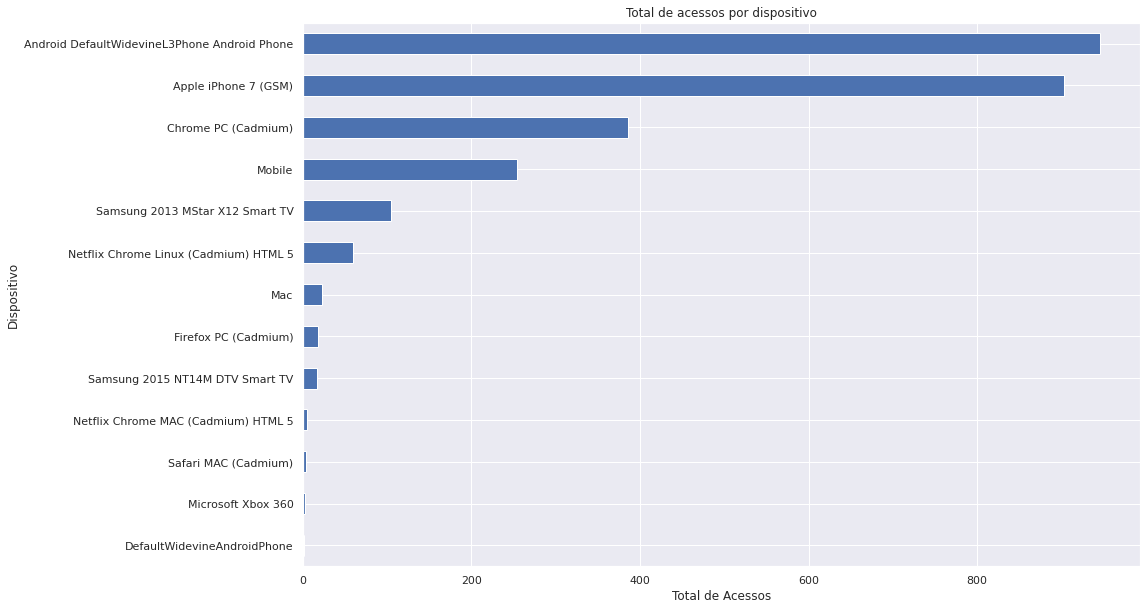

In [ ]:
# Grafico Total de acessos por dispositivo
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total de acessos por dispositivo')
total_acessos_por_dispositivos['Access_Number'].sort_values(ascending=True).plot.barh()

plt.xlabel('Total de Acessos')
plt.ylabel('Dispositivo')

plt.show()

In [ ]:
# Total acessos por país
acessos_por_país = df_netflix_viewing_activity['Country'].value_counts()
acessos_por_país = acessos_por_país.to_frame()
acessos_por_país = acessos_por_país.rename(columns={"Country": "Access_Number"})
acessos_por_país

,Access_Number
BR (Brazil),2023
IE (Ireland),677
PT (Portugal),8
US (United States),7
GB (United Kingdom),5
PL (Poland),1
IT (Italy),1


In [ ]:
import plotly.graph_objects as go

labels = acessos_por_país.index[:3]
values = acessos_por_país['Access_Number'][:3]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [ ]:
import plotly.express as px
data = dict(
    number=acessos_por_país["Access_Number"],
    country=acessos_por_país.index)
fig = px.funnel(data, x='number', y='country')
fig.show()

In [ ]:
# Total acessos por ano (natascha)
acessos_por_ano = df_netflix_viewing_activity['year'].value_counts()
acessos_por_ano = acessos_por_ano.to_frame()
acessos_por_ano = acessos_por_ano.rename(columns={"year": "Access_Number"})

acessos_por_ano_dict = {
    2017: 0,
    2018: 0,
    2019: 0,
    2020: 0,
    2021: 0
}

acessos_por_ano_dict[2017] = acessos_por_ano['Access_Number'][2017]
acessos_por_ano_dict[2018] = acessos_por_ano['Access_Number'][2018]
acessos_por_ano_dict[2019] = acessos_por_ano['Access_Number'][2019]
acessos_por_ano_dict[2020] = acessos_por_ano['Access_Number'][2020]
acessos_por_ano_dict[2021] = acessos_por_ano['Access_Number'][2021]

acessos_por_ano_netflix = pd.DataFrame.from_dict(acessos_por_ano_dict, orient='index', columns=['Access_Number'])
acessos_por_ano_netflix

,Access_Number
2017,21
2018,1061
2019,1250
2020,312
2021,78


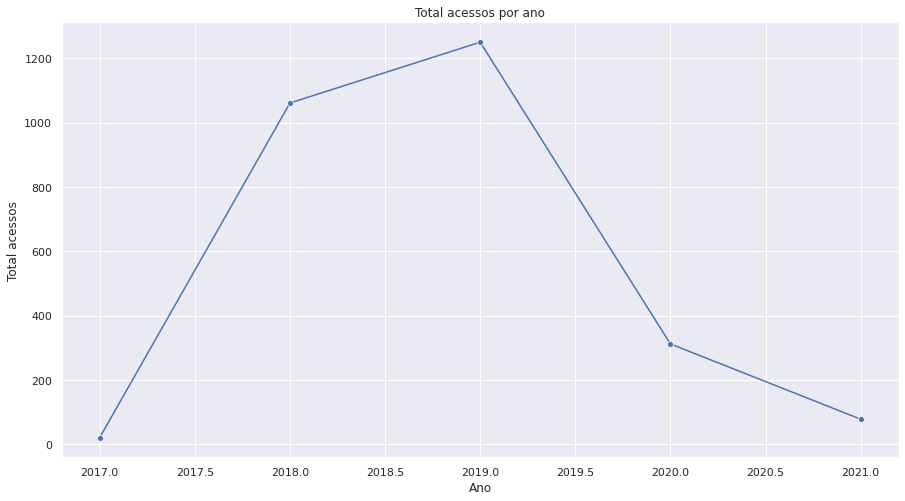

In [ ]:
# grafico Total acessos por ano (natascha)
sns.set()
plt.figure(figsize=(15, 8))

plt.title('Total acessos por ano')
sns.lineplot(data=acessos_por_ano_netflix, x=acessos_por_ano_netflix.index, y=acessos_por_ano_netflix['Access_Number'], marker="o")

plt.xlabel('Ano')
plt.ylabel('Total acessos')

plt.show()

In [38]:
# Total acessos por mês
acessos_por_mes_netflix = df_netflix_viewing_activity['month'].value_counts()
acessos_por_mes_netflix = acessos_por_mes_netflix.to_frame()
acessos_por_mes_netflix = acessos_por_mes_netflix.rename(columns={"month": "Access_Number"})
acessos_por_mes_netflix

,Access_Number
November,344
January,343
May,290
April,285
March,270
December,228
September,224
July,176
October,163
August,162


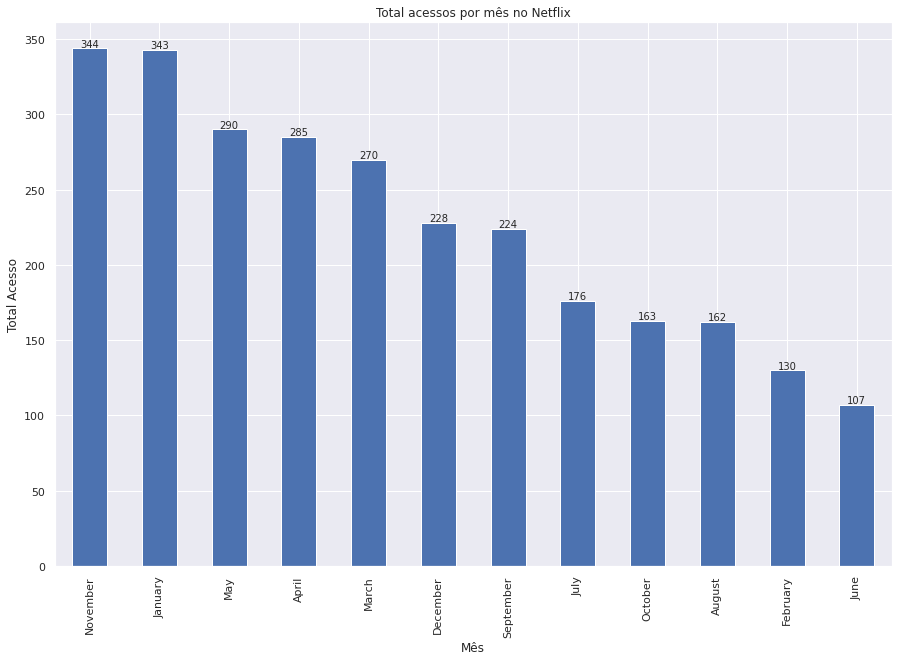

In [39]:
# Grafico Total acessos por mês
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por mês no Netflix')
acessos_por_mes_netflix["Access_Number"].plot.bar()

for index, data in enumerate(acessos_por_mes_netflix["Access_Number"]):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Mês')
plt.ylabel('Total Acesso')

plt.show()

In [ ]:
# Total acessos por day_name
acessos_por_day_name_netflix = df_netflix_viewing_activity['day_name'].value_counts()
acessos_por_day_name_netflix = acessos_por_day_name_netflix.to_frame()
acessos_por_day_name_netflix = acessos_por_day_name_netflix.rename(columns={"day_name": "Access_Number"})
acessos_por_day_name_netflix

,Access_Number
Sunday,522
Monday,468
Saturday,405
Friday,400
Wednesday,360
Thursday,311
Tuesday,256


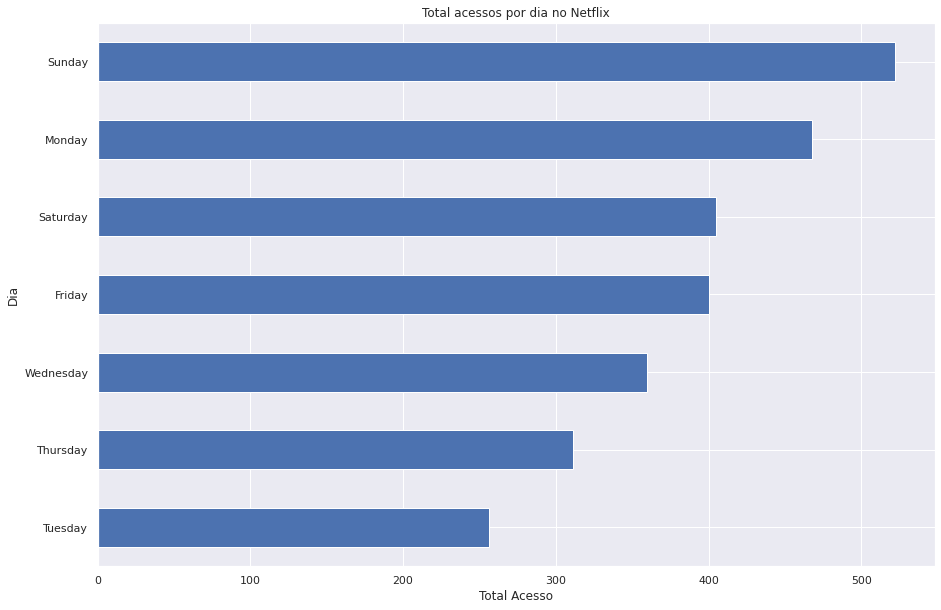

In [ ]:
# Grafico Total acessos por day_name
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por dia no Netflix')
acessos_por_day_name_netflix["Access_Number"].sort_values(ascending=True).plot.barh()

plt.xlabel('Total Acesso')
plt.ylabel('Dia')

plt.show()

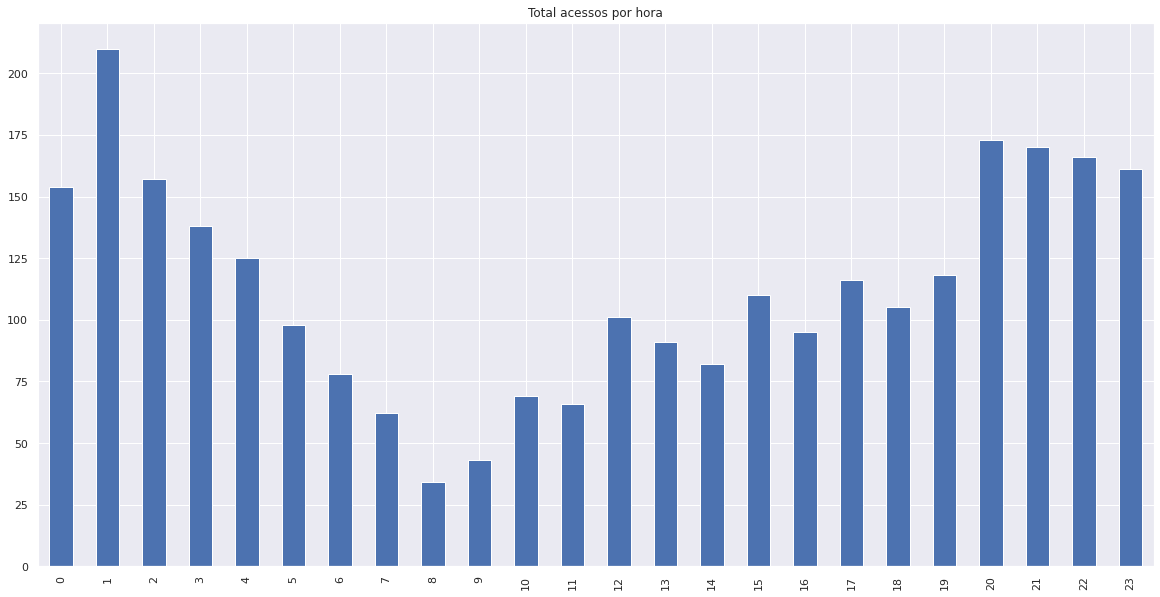

In [ ]:
df_netflix_viewing_activity['hour'] = pd.Categorical(df_netflix_viewing_activity['Start_Time'].dt.hour, categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

acesso_por_hora_netflix = df_netflix_viewing_activity['hour'].value_counts()

# ordenar a hora
acesso_por_hora_netflix = acesso_por_hora_netflix.sort_index()

# plotando o grafico
sns.set()
acesso_por_hora_netflix.plot(kind='bar', figsize=(20,10), title='Total acessos por hora')
plt.show()

In [ ]:
acessos_por_part_of_day_netflix = df_netflix_viewing_activity['part_of_day'].value_counts()
percentual_part_of_day_netflix = df_netflix_viewing_activity['part_of_day'].value_counts(normalize = True) * 100
dist_freq_part_of_day = pd.DataFrame({'Access_Number': acessos_por_part_of_day_netflix, 'Percentage (%)': percentual_part_of_day_netflix})

dist_freq_part_of_day

,Access_Number,Percentage (%)
Late Night,784,28.802351
Evening,512,18.809699
Night,497,18.258633
Noon,378,13.886848
Morning,279,10.249816
Early Morning,272,9.992652


In [ ]:
'''
part_of_day
hora > 4 and hora <= 8:Early Morning
hora > 8 and hora <= 12:Morning
hora > 12 and hora <= 16:Noon
hora > 16 and hora <= 20: Evening
hora > 20 and hora <= 24: Night
hora <= 4: Late Night
'''

part_of_day_dict = {
    'Early Morning': 0,
    'Morning': 0,
    'Noon': 0,
    'Evening': 0,
    'Night': 0,
    'Late Night': 0
}

part_of_day_dict["Early Morning"] = dist_freq_part_of_day['Access_Number']['Early Morning']
part_of_day_dict["Morning"] = dist_freq_part_of_day['Access_Number']['Morning']
part_of_day_dict["Noon"] = dist_freq_part_of_day['Access_Number']['Noon']
part_of_day_dict["Evening"] = dist_freq_part_of_day['Access_Number']['Evening']
part_of_day_dict["Night"] = dist_freq_part_of_day['Access_Number']['Night']
part_of_day_dict["Late Night"] = dist_freq_part_of_day['Access_Number']['Late Night']

acessos_por_part_of_day_netflix = pd.DataFrame.from_dict(part_of_day_dict, orient='index', columns=['Access_Number'])
acessos_por_part_of_day_netflix

,Access_Number
Early Morning,272
Morning,279
Noon,378
Evening,512
Night,497
Late Night,784


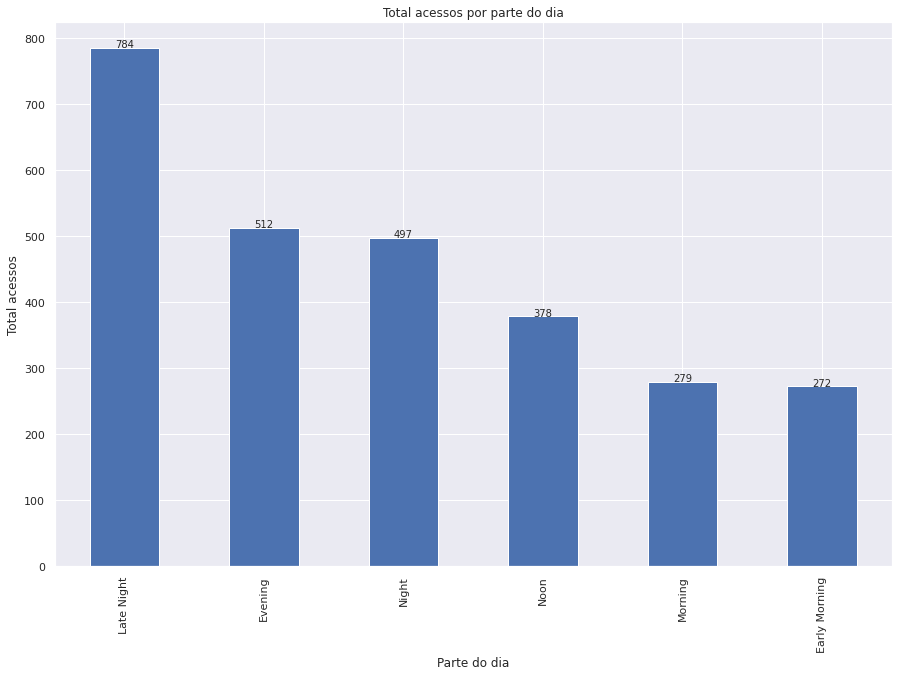

In [ ]:
# grafico Total acessos por part_of_day
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por parte do dia')
acessos_por_part_of_day_netflix['Access_Number'].sort_values(ascending=False).plot.bar()

for index, data in enumerate(acessos_por_part_of_day_netflix['Access_Number'].sort_values(ascending=False)):
    plt.text(x=index , y=data+1, s=f"{data}", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Parte do dia')
plt.ylabel('Total acessos')

plt.show()

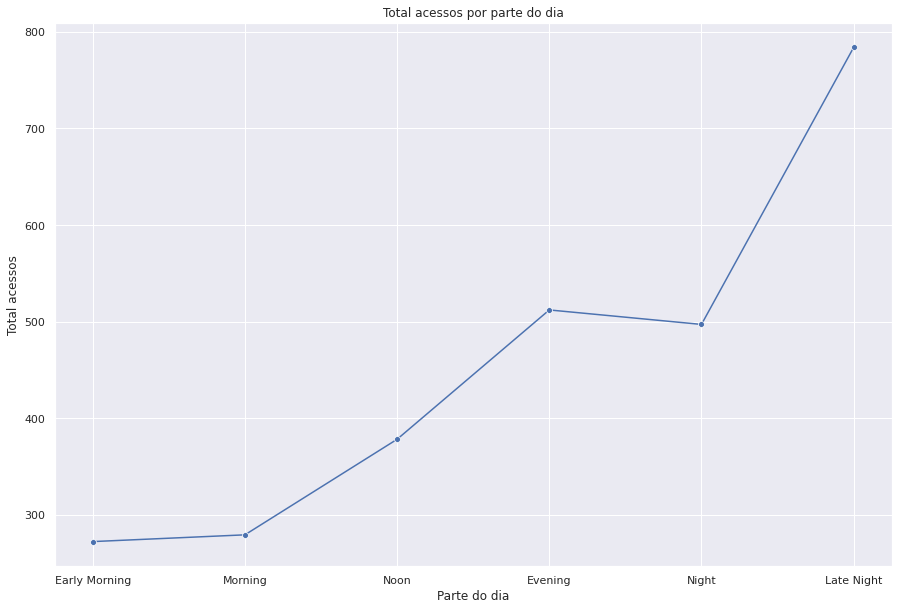

In [ ]:
# grafico Total acessos por part_of_day
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por parte do dia')
sns.lineplot(data=acessos_por_part_of_day_netflix, x=acessos_por_part_of_day_netflix.index, y=acessos_por_part_of_day_netflix['Access_Number'], marker="o")

plt.xlabel('Parte do dia')
plt.ylabel('Total acessos')

plt.show()

'''
part_of_day
hora > 4 and hora <= 8:Early Morning
hora > 8 and hora <= 12:Morning
hora > 12 and hora <= 16:Noon
hora > 16 and hora <= 20: Evening
hora > 20 and hora <= 24: Night
hora <= 4: Late Night
'''

In [41]:
df_netflix_titles = df_netflix_viewing_activity[~df_netflix_viewing_activity['Supplemental_Video_Type'].isin(
    ['RECAP', 'TEASER_TRAILER', 'TRAILER', 'HOOK', 'PROMOTIONAL','TUTORIAL', 'BONUS_VIDEO', 'PREVIEW'])].copy()

df_netflix_titles.head()

,Start_Time,Duration,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country,year,month,day,day_name,part_of_day,clean_title
0,2021-07-09 19:49:40-03:00,0 days 01:39:00,Rua do Medo: 1994 – Parte 1,NaN,Safari MAC (Cadmium),01:39:00,01:39:00,BR (Brazil),2021,July,9,Friday,Night,Rua do Medo
2,2021-06-07 00:11:10-03:00,0 days 00:24:36,Feel Good: Temporada 1 (Channel 4): Episódio 1...,NaN,Safari MAC (Cadmium),00:24:36,00:24:36,BR (Brazil),2021,June,7,Monday,Late Night,Feel Good
15,2021-06-03 15:40:01-03:00,0 days 01:13:52,O Contador de Auschwitz,NaN,Chrome PC (Cadmium),01:16:33,01:16:33,BR (Brazil),2021,June,3,Thursday,Evening,O Contador de Auschwitz
16,2021-06-02 23:48:47-03:00,0 days 00:02:41,O Contador de Auschwitz,NaN,Chrome PC (Cadmium),00:02:41,Not latest view,BR (Brazil),2021,June,3,Thursday,Late Night,O Contador de Auschwitz
18,2021-06-02 22:00:22-03:00,0 days 01:23:19,The Last Days,NaN,Chrome PC (Cadmium),01:22:35,01:22:35,BR (Brazil),2021,June,3,Thursday,Late Night,The Last Days


In [42]:
# Titulos mais acessados na netflix
titulos_netflix_mais_acessados = df_netflix_titles['clean_title'].value_counts()[:10]
titulos_netflix_mais_acessados = titulos_netflix_mais_acessados.to_frame()
titulos_netflix_mais_acessados = titulos_netflix_mais_acessados.rename(columns={"clean_title": "Access_Number"})
titulos_netflix_mais_acessados

,Access_Number
Wynonna Earp,258
A Anatomia de Grey,219
Orange Is the New Black,118
One Day at a Time,115
Brooklyn Nine-Nine,108
Call the Midwife,98
The Crown,88
Rick and Morty,87
GLOW,64
The Good Place,62


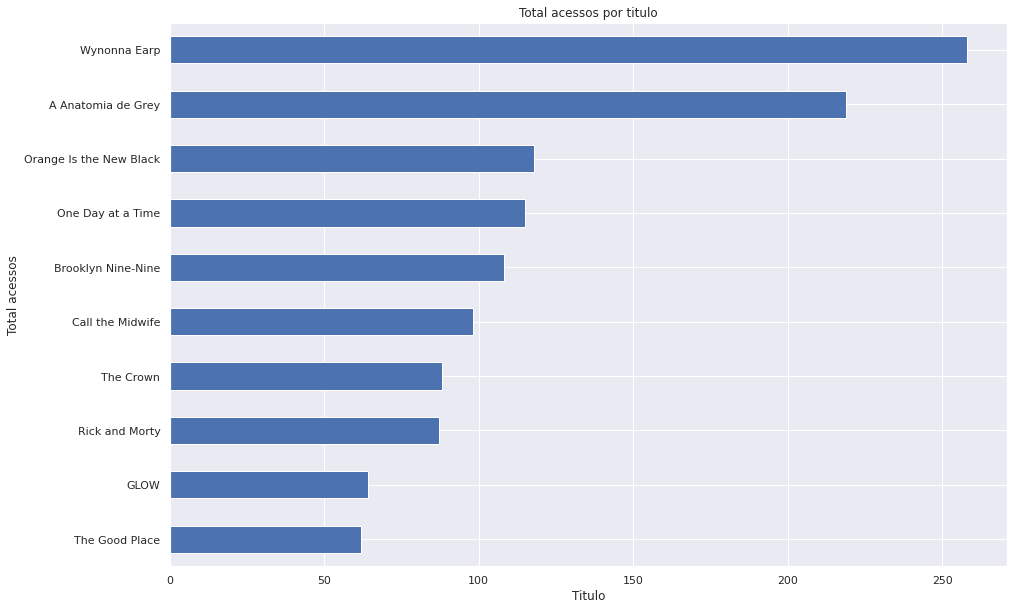

In [43]:
# grafico titulos mais acessados na netflix
sns.set()
plt.figure(figsize=(15, 10))

plt.title('Total acessos por titulo')
titulos_netflix_mais_acessados['Access_Number'].sort_values(ascending=True).plot.barh()

plt.xlabel('Titulo')
plt.ylabel('Total acessos')

plt.show()

In [3]:
# preparando dados para extrair numero de horas assistidos
df_netflix_viewing_activity = df_netflix_viewing_activity.set_index('Start_Time')

df_netflix_viewing_activity.index = df_netflix_viewing_activity.index.tz_convert('America/Sao_Paulo')

df_netflix_viewing_activity = df_netflix_viewing_activity.reset_index()

df_netflix_viewing_activity['Duration'] = pd.to_timedelta(df_netflix_viewing_activity['Duration'])
df_netflix_viewing_activity.head(1)

,Start_Time,Duration,Title,Supplemental_Video_Type,Device_Type,Bookmark,Latest_Bookmark,Country,year,month,day,day_name,part_of_day,clean_title
0,2021-07-09 19:49:40-03:00,0 days 01:39:00,Rua do Medo: 1994 – Parte 1,NaN,Safari MAC (Cadmium),01:39:00,01:39:00,BR (Brazil),2021,July,9,Friday,Night,Rua do Medo


In [ ]:
df_netflix_viewing_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype                            
---  ------                   --------------  -----                            
 0   Start_Time               2722 non-null   datetime64[ns, America/Sao_Paulo]
 1   Duration                 2722 non-null   timedelta64[ns]                  
 2   Title                    2722 non-null   object                           
 3   Supplemental_Video_Type  58 non-null     object                           
 4   Device_Type              2722 non-null   object                           
 5   Bookmark                 2722 non-null   object                           
 6   Latest_Bookmark          2722 non-null   object                           
 7   Country                  2722 non-null   object                           
 8   year                     2722 non-null   int64                            
 9   month   

In [9]:
# Tempo total gasto na plataforma netflix
def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return hours, minutes, seconds

tempo_total_gasto_netflix = df_netflix_viewing_activity['Duration'].sum()
hours, minutes, seconds = convert_timedelta(tempo_total_gasto_netflix)
print(f'Tempo total: {tempo_total_gasto_netflix}')
print(f'{hours} horas, {minutes} minutos, {seconds} segundos')

Tempo total: 41 days 17:03:51
1001 horas, 3 minutos, 51 segundos


In [10]:
# Titulos mais assistidos na plataforma netflix
titulos_mais_assistidos = df_netflix_viewing_activity.groupby("clean_title")["Duration"].sum()
df_titulos_mais_assistidos = pd.DataFrame({"Titulo": titulos_mais_assistidos.index, "Tempo": titulos_mais_assistidos.values})

# mostrando o top 10 mais assistidos
df_titulos_mais_assistidos = df_titulos_mais_assistidos.nlargest(columns='Tempo', n=10)
df_titulos_mais_assistidos

,Titulo,Tempo
6,A Anatomia de Grey,3 days 14:22:10
305,Wynonna Earp,2 days 12:40:59
204,Orange Is the New Black,2 days 05:25:21
271,The Crown,1 days 17:43:33
58,Call the Midwife,1 days 12:32:43
203,One Day at a Time,1 days 11:32:54
57,Brooklyn Nine-Nine,1 days 07:19:50
168,Merlí,1 days 04:38:29
162,Marvel - Demolidor,0 days 22:13:47
116,GLOW,0 days 21:50:43


In [24]:
def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return hours

df_titulos_mais_assistidos['horas'] = df_titulos_mais_assistidos['Tempo'].apply(convert_timedelta)
df_titulos_mais_assistidos.set_index('Titulo', inplace=True)

,Tempo,horas
Titulo,,
A Anatomia de Grey,3 days 14:22:10,86
Wynonna Earp,2 days 12:40:59,60
Orange Is the New Black,2 days 05:25:21,53
The Crown,1 days 17:43:33,41
Call the Midwife,1 days 12:32:43,36
One Day at a Time,1 days 11:32:54,35
Brooklyn Nine-Nine,1 days 07:19:50,31
Merlí,1 days 04:38:29,28
Marvel - Demolidor,0 days 22:13:47,22


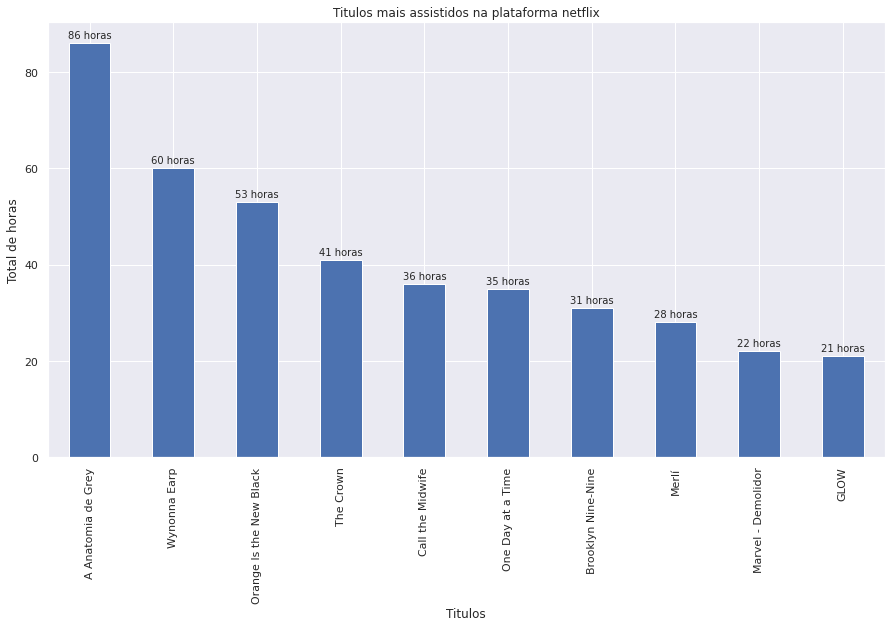

In [33]:
# grafico Titulos mais assistidos na plataforma netflix
sns.set()
plt.figure(figsize=(15, 8))

plt.title('Titulos mais assistidos na plataforma netflix')
df_titulos_mais_assistidos['horas'].sort_values(ascending=False).plot.bar()

for index, data in enumerate(df_titulos_mais_assistidos['horas'].sort_values(ascending=False)):
    plt.text(x=index , y=data+1, s=f"{data} horas", fontdict=dict(fontsize=10), ha='center')

plt.xlabel('Titulos')
plt.ylabel('Total de horas')

plt.show()

In [70]:
# média de horas por dia
df_horas_netflix_por_dia = df_netflix_titles.groupby(["year", "month", "day"])["Duration"].sum()
df_horas_netflix_por_dia = df_horas_netflix_por_dia.to_frame()
df_horas_netflix_por_dia

Duration
year month    day                
2017 December 16  0 days 02:00:15
              17  0 days 02:43:19
     November 6   0 days 01:30:11
     October  22  0 days 00:00:05
              26  0 days 00:04:43
...                           ...
2021 January  24  0 days 03:30:26
     July     9   0 days 01:39:00
     June     3   0 days 02:39:52
              7   0 days 00:24:36
     March    8   0 days 00:00:02

[494 rows x 1 columns]

In [79]:
# Horas médias por dia na plataforma netflix
def convert_timedelta(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = (seconds % 60)
    return hours, minutes, seconds

media_netflix_por_dia = df_horas_netflix_por_dia['Duration'].sum() / df_horas_netflix_por_dia.shape[0]
hours, minutes, seconds = convert_timedelta(media_netflix_por_dia)
print(f'Média de horas por dia: {hours} horas, {minutes} minutos, {seconds} segundos')

Média de horas por dia: 2 horas, 1 minutos, 30 segundos
